# <center>**基于机器学习的 A 股市场的α收益分类研究**</center>

## 导入数据

In [1]:
import pandas as pd
path='./数据/个股日交易衍生指标230722727/STK_MKT_DALYR.csv'
path1='./数据/个股日交易衍生指标230722727/STK_MKT_DALYR1.csv'
df1=pd.read_csv(path)
df2=pd.read_csv(path1)
data1=pd.concat([df1,df2])
data1

SecurityID TradingDate  Symbol ShortName         PE        PB  \
0       201000000001  2019-06-03       1      平安银行   8.233052  0.851217   
1       201000000001  2019-06-04       1      平安银行   8.198460  0.847641   
2       201000000001  2019-06-05       1      平安银行   8.281482  0.856224   
3       201000000001  2019-06-06       1      平安银行   8.246889  0.852648   
4       201000000001  2019-06-10       1      平安银行   8.537468  0.882691   
...              ...         ...     ...       ...        ...       ...   
884892  201004191685  2021-05-25  689009      九号公司  65.758420  1.306943   
884893  201004191685  2021-05-26  689009      九号公司  66.189654  1.315513   
884894  201004191685  2021-05-27  689009      九号公司  69.016634  1.371699   
884895  201004191685  2021-05-28  689009      九号公司  66.889212  1.329417   
884896  201004191685  2021-05-31  689009      九号公司  70.243256  1.396078   

             PCF        PS  Turnover  CirculatedMarketValue  ChangeRatio  \
0       8.246676  1.923774   0.00881           2.043259e+11     -0.02299   
1       8.212026  1.915691   0.00568           2.034674e+11     -0.00420   
2       8.295186  1.935090   0.00436           2.055279e+11      0.01013   
3       8.260536  1.927007   0.00253           2.046693e+11     -0.00418   
4       8.551595  1.994905   0.00667           2.118808e+11      0.03523   
...          ...       ...       ...                    ...          ...   
884892  4.002433  0.804878   0.19611           5.938488e+08      0.02464   
884893  4.028681  0.810157   0.14078           5.977432e+08      0.00656   
884894  4.200747  0.844759   0.32472           6.232730e+08      0.04271   
884895  4.071260  0.818719   0.20564           6.040607e+08     -0.03082   
884896  4.275406  0.859772   0.23935           6.343503e+08      0.05014   

            Amount  Liquidility  
0       1816591877     0.000013  
1       1147709578     0.000008  
2        899331716     0.000009  
3        519425127     0.000009  
4       1404223620     0.000012  
...            ...          ...  
884892   115397950     0.000143  
884893    84257923     0.000138  
884894   200655288     0.000143  
884895   126332295     0.000149  
884896   150414694     0.000159  

[1884897 rows x 13 columns]

In [2]:
path3='./数据/估值指标230849919/STK_MKT_ValuationMetrics.csv'
path4='./数据/估值指标230849919/STK_MKT_ValuationMetrics1.csv'
path5='./数据/估值指标230849919/STK_MKT_ValuationMetrics2.csv'
df3=pd.read_csv(path3)
df4=pd.read_csv(path4)
df5=pd.read_csv(path5)
data2=pd.concat([df3,df4,df5])
data2

Symbol TradingDate    PE1TTM  PCF1TTM     PSTTM   MarketValue
0           1  2019-06-03  7.960103      NaN  1.871032  2.043279e+11
1           1  2019-06-04  7.926658      NaN  1.863170  2.034694e+11
2           1  2019-06-05  8.006928      NaN  1.882038  2.055298e+11
3           1  2019-06-06  7.973482      NaN  1.874176  2.046713e+11
4           1  2019-06-07  7.973482      NaN  1.874176  2.046713e+11
...       ...         ...       ...      ...       ...           ...
37839  689009  2021-05-25       NaN      NaN       NaN  4.831477e+09
37840  689009  2021-05-26       NaN      NaN       NaN  4.863161e+09
37841  689009  2021-05-27       NaN      NaN       NaN  5.070868e+09
37842  689009  2021-05-28       NaN      NaN       NaN  4.914560e+09
37843  689009  2021-05-31       NaN      NaN       NaN  5.160992e+09

[2037844 rows x 6 columns]

In [3]:
path6='./数据/股票风格表231035469/STK_MKT_StyleBox.csv'
path7='./数据/股票风格表231035469/STK_MKT_StyleBox1.csv'
path8='./数据/股票风格表231035469/STK_MKT_StyleBox2.csv'
df6=pd.read_csv(path6)
df7=pd.read_csv(path7)
df8=pd.read_csv(path8)
data3=pd.concat([df6,df7,df8])
data3

Symbol TradingDate  StockPrice          EPS     EPSToP       NAVToP  \
0           1  2019-06-03       11.90     1.445428   0.121465     1.174816   
1           1  2019-06-04       11.85     1.445428   0.121977     1.179773   
2           1  2019-06-05       11.97     1.445428   0.120754     1.167946   
3           1  2019-06-06       11.92     1.445428   0.121261     1.172845   
4           1  2019-06-07       11.92     1.445428   0.121261     1.172845   
...       ...         ...         ...          ...        ...          ...   
37839  689009  2021-05-25       68.62  1557.997057  22.704708  1142.380520   
37840  689009  2021-05-26       69.07  1557.997057  22.556784  1134.937763   
37841  689009  2021-05-27       72.02  1557.997057  21.632839  1088.449754   
37842  689009  2021-05-28       69.80  1557.997057  22.320875  1123.068070   
37843  689009  2021-05-31       73.30  1557.997057  21.255076  1069.442719   

       RevenuePerShareToP  DividentPerShareToP  NetProfitGrowth  EquityGrowth  \
0                0.519824             0.011429         0.058527      0.166123   
1                0.522017             0.011477         0.058527      0.166123   
2                0.516784             0.011362         0.058527      0.166123   
3                0.518952             0.011409         0.058527      0.166123   
4                0.518952             0.011409         0.058527      0.166123   
...                   ...                  ...              ...           ...   
37839         1854.970477                  NaN         0.564365     -0.049274   
37840         1842.885104                  NaN         0.564365     -0.049274   
37841         1767.398974                  NaN         0.564365     -0.049274   
37842         1823.611377                  NaN         0.564365     -0.049274   
37843         1736.535800                  NaN         0.564365     -0.049274   

       RevenueGrowth  OperatingNCFGrowth  
0           0.113971           -6.440553  
1           0.113971           -6.440553  
2           0.113971           -6.440553  
3           0.113971           -6.440553  
4           0.113971           -6.440553  
...              ...                 ...  
37839       1.077369            0.703319  
37840       1.077369            0.703319  
37841       1.077369            0.703319  
37842       1.077369            0.703319  
37843       1.077369            0.703319  

[2037844 rows x 12 columns]

In [4]:
# 对以上已导入的数据进行merge，并观察是否有处理（concat、merge）错误
data4=pd.merge(data1,data2,left_on=['TradingDate','Symbol'],right_on=['TradingDate','Symbol'],how='right')
data=pd.merge(data4,data3,left_on=['TradingDate','Symbol'],right_on=['TradingDate','Symbol'],how='right')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037844 entries, 0 to 2037843
Data columns (total 27 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SecurityID             float64
 1   TradingDate            object 
 2   Symbol                 int64  
 3   ShortName              object 
 4   PE                     float64
 5   PB                     float64
 6   PCF                    float64
 7   PS                     float64
 8   Turnover               float64
 9   CirculatedMarketValue  float64
 10  ChangeRatio            float64
 11  Amount                 float64
 12  Liquidility            float64
 13  PE1TTM                 float64
 14  PCF1TTM                float64
 15  PSTTM                  float64
 16  MarketValue            float64
 17  StockPrice             float64
 18  EPS                    float64
 19  EPSToP                 float64
 20  NAVToP                 float64
 21  RevenuePerShareToP     float64
 22  DividentPerShareTo

In [5]:
path9='./数据/data'
data.to_csv(path9,index=True,header=True)
path10='./数据/beta.xlsx'
df9=pd.read_excel(path10)

data5=pd.merge(data,df9,left_on='Symbol',right_on='Symbol',how='right')
path11='./数据/上海银行间同业拆放利率(SHIBOR)(日).xls'
data5['TradingDate']=pd.to_datetime(data5['TradingDate'])
df10=pd.read_excel(path11)
data6=pd.merge(data5,df10,left_on='TradingDate',right_on='TradingDate',how='right')
path12='./数据/1.xlsx'
df11=pd.read_excel(path12)
data7=pd.merge(data6,df11,left_on='Symbol',right_on='Symbol',how='right')
path13='./数据/内控评价报告信息表135110587/IC_EvaluationRepInfo.xlsx'
path14='./数据/Rm.xlsx'
df12=pd.read_excel(path14)
df12['TradingDate']=pd.to_datetime(df12['TradingDate'])
data8=pd.merge(data7,df12,left_on='TradingDate',right_on='TradingDate',how='right')
del data8['ShortName_y']
data8

SecurityID TradingDate    Symbol ShortName_x          PE  \
0        2.010000e+11  2019-06-03       1.0        平安银行    8.233052   
1        2.010000e+11  2019-06-03       2.0         万科A    8.848244   
2        2.010000e+11  2019-06-03       4.0        国农科技         NaN   
3        2.010000e+11  2019-06-03       5.0        世纪星源   21.269031   
4        2.010000e+11  2019-06-03       6.0        深振业A    8.477586   
...               ...         ...       ...         ...         ...   
1885520  2.010042e+11  2021-05-31  688777.0        中控技术  109.634742   
1885521  2.010042e+11  2021-05-31  688788.0        科思科技   60.820449   
1885522  2.010042e+11  2021-05-31  688819.0        天能股份   18.194247   
1885523  2.010042e+11  2021-05-31  688981.0        中芯国际  102.617228   
1885524  2.010042e+11  2021-05-31  689009.0        九号公司   70.243256   

                PB        PCF         PS  Turnover  CirculatedMarketValue  \
0         0.851217   8.246676   1.923774   0.00881           2.043259e+11   
1         1.268261  26.346724   1.003861   0.00327           2.985900e+11   
2        10.141702        NaN   5.067871   0.01949           1.836150e+09   
3         2.004049        NaN   6.509973   0.00474           3.163259e+09   
4         1.160556  11.431442   2.950610   0.00396           7.399346e+09   
...            ...        ...        ...       ...                    ...   
1885520  11.500102  45.608916  14.690769   0.04816           3.966940e+09   
1885521   3.786740   5.831858  16.442909   0.04880           2.481561e+09   
1885522   5.819212  69.611978   1.181756   0.04673           4.312158e+09   
1885523   3.138790   9.154289  16.183257   0.01700           3.971406e+11   
1885524   1.396078   4.275406   0.859772   0.23935           6.343503e+08   

         ...  RevenuePerShareToP  DividentPerShareToP  NetProfitGrowth  \
0        ...            0.519824             0.011429         0.058527   
1        ...            1.019886             0.034039         0.268649   
2        ...            0.197321                  NaN        -0.322204   
3        ...            0.153610                  NaN         0.926165   
4        ...            0.338913             0.032969         0.208513   
...      ...                 ...                  ...              ...   
1885520  ...            0.068070                  NaN         0.494315   
1885521  ...            0.060816                  NaN        -3.261017   
1885522  ...            0.961530                  NaN         0.159289   
1885523  ...            2.228100                  NaN         0.960147   
1885524  ...         1736.535800                  NaN         0.564365   

         EquityGrowth  RevenueGrowth  OperatingNCFGrowth      beta   SHIBOR  \
0            0.166123       0.113971           -6.440553  0.914300  0.03208   
1            0.194770       0.200296            0.334842  0.866400  0.03208   
2            0.039434       0.752797            3.125848 -0.462600  0.03208   
3            0.272356       1.334852          -12.767341  0.558800  0.03208   
4            0.109827       0.054555            0.343340  1.525500  0.03208   
...               ...            ...                 ...       ...      ...   
1885520      0.437241       0.216608            0.357363  1.239662  0.02911   
1885521      1.174626       7.801884            1.919864  0.353148  0.02911   
1885522      0.114557       0.235157           -0.115685  0.738700  0.02911   
1885523      0.277969       0.016332            0.116501  0.288718  0.02911   
1885524     -0.049274       1.077369            0.703319  0.000000  0.02911   

         前十股东占比     E(Rm)  
0        0.7295 -0.005410  
1        0.5931 -0.005410  
2        0.5867 -0.005410  
3        0.2278 -0.005410  
4        0.4444 -0.005410  
...         ...       ...  
1885520  0.5759  0.007179  
1885521  0.7181  0.007179  
1885522  0.8790  0.007179  
1885523  0.8247  0.007179  
1885524  0.7088  0.007179  

[1885525 rows x 31 columns]

In [6]:
# 以上经过导入、合并的raw_data 重新命名为“total_raw.csv”进行储存。
data8.to_csv('total_raw.csv')

## 数据清洗

In [7]:
import numpy as np
from pylab import mpl


mpl.rcParams['font.sans-serif'] = ['SimHei'] 
mpl.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_columns', None)
df = data8.drop(data8.columns[[0]],axis=1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885525 entries, 0 to 1885524
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   TradingDate            datetime64[ns]
 1   Symbol                 float64       
 2   ShortName_x            object        
 3   PE                     float64       
 4   PB                     float64       
 5   PCF                    float64       
 6   PS                     float64       
 7   Turnover               float64       
 8   CirculatedMarketValue  float64       
 9   ChangeRatio            float64       
 10  Amount                 float64       
 11  Liquidility            float64       
 12  PE1TTM                 float64       
 13  PCF1TTM                float64       
 14  PSTTM                  float64       
 15  MarketValue            float64       
 16  StockPrice             float64       
 17  EPS                    float64       
 18  EPSToP                

Symbol            PE            PB           PCF            PS  \
count  1.885525e+06  1.651470e+06  1.867393e+06  1.051098e+06  1.877330e+06   
mean   3.217477e+05  7.676038e+01  4.336770e+00  3.138761e+02  1.696614e+01   
std    2.688725e+05  1.660796e+02  1.194743e+01  6.144083e+03  6.298555e+02   
min    1.000000e+00  3.583430e-01  1.380000e-04  7.475010e-01  3.660000e-04   
25%    2.524000e+03  2.084714e+01  1.483061e+00  1.709817e+01  1.436207e+00   
50%    3.005390e+05  3.731916e+01  2.442896e+00  3.976207e+01  2.926839e+00   
75%    6.008140e+05  7.210520e+01  4.273931e+00  1.028857e+02  6.102924e+00   
max    6.890090e+05  6.797987e+03  1.273334e+03  6.117948e+05  6.837169e+04   

           Turnover  CirculatedMarketValue   ChangeRatio        Amount  \
count  1.877858e+06           1.877858e+06  1.877118e+06  1.877858e+06   
mean   2.852541e-02           1.550686e+10  5.195352e-04  1.908647e+08   
std    4.777428e-02           7.607732e+10  3.035727e-02  4.668994e+08   
min    3.000000e-05           2.220069e+08 -6.337800e-01  6.386400e+04   
25%    6.830000e-03           2.102884e+09 -1.430000e-02  2.600664e+07   
50%    1.422000e-02           3.937893e+09  0.000000e+00  6.465672e+07   
75%    3.107000e-02           9.041283e+09  1.332000e-02  1.735886e+08   
max    7.102320e+00           3.267370e+12  3.149930e+00  4.796717e+10   

        Liquidility        PE1TTM       PCF1TTM         PSTTM   MarketValue  \
count  1.877118e+06  1.489291e+06  1.477003e+06  1.796217e+06  1.885525e+06   
mean   5.932928e-04  1.091161e+02  9.585966e+01  1.051837e+01  1.871894e+10   
std    3.697516e-03  2.452905e+03  1.562225e+03  4.440494e+02  7.862166e+10   
min    0.000000e+00  5.888640e-01  2.016900e-01  3.660000e-04  3.712763e+08   
25%    1.160000e-04  1.846276e+01  1.064263e+01  1.388588e+00  3.059021e+09   
50%    2.610000e-04  3.266911e+01  2.172710e+01  2.771445e+00  5.323949e+09   
75%    5.380000e-04  6.170784e+01  4.676613e+01  5.674127e+00  1.200882e+10   
max    7.352000e-01  3.393319e+05  1.615171e+05  6.417972e+04  3.267370e+12   

         StockPrice           EPS        EPSToP        NAVToP  \
count  1.885525e+06  1.838440e+06  1.838440e+06  1.838440e+06   
mean   1.931138e+01  5.011758e-01  3.933601e-03  5.993141e-01   
std    4.159172e+01  1.138775e+01  3.723410e-01  7.830398e+00   
min    6.700000e-01 -3.706657e+01 -2.613634e+01 -2.572098e+01   
25%    5.540000e+00  8.464500e-02  9.714000e-03  2.533970e-01   
50%    9.830000e+00  3.030370e-01  2.535700e-02  4.308550e-01   
75%    1.919000e+01  6.845830e-01  4.933100e-02  7.008543e-01   
max    2.601000e+03  1.557997e+03  2.639331e+01  1.327971e+03   

       RevenuePerShareToP  DividentPerShareToP  NetProfitGrowth  EquityGrowth  \
count        1.838067e+06         1.317232e+06     1.881681e+06  1.885255e+06   
mean         8.075991e-01         1.517870e-02    -8.303331e+00  3.397066e-01   
std          1.277082e+01         1.882390e-02     1.265704e+03  1.328665e+01   
min         -6.625400e-02         0.000000e+00    -1.750635e+05 -1.903831e+02   
25%          1.775790e-01         4.399000e-03    -1.545710e-01  4.566800e-02   
50%          3.633900e-01         9.346000e-03     1.385240e-01  1.235110e-01   
75%          7.330750e-01         1.928900e-02     4.158290e-01  2.527030e-01   
max          2.156329e+03         5.785120e-01     1.021687e+04  1.775325e+03   

       RevenueGrowth  OperatingNCFGrowth          beta        SHIBOR  \
count   1.884795e+06        1.836873e+06  1.885525e+06  1.885525e+06   
mean    4.654766e-01       -1.694542e+00  9.626524e-01  2.862068e-02   
std     1.053118e+01        2.987752e+02  7.939705e-01  4.112468e-03   
min    -7.315210e-01       -4.076243e+04 -2.601703e+01  1.674000e-02   
25%     5.536600e-02       -4.467860e-01  5.027000e-01  2.855000e-02   
50%     1.456180e-01        1.854680e-01  8.939000e-01  3.031000e-02   
75%     2.731120e-01        7.337220e-01  1.311600e+00  3.097000e-02   
max     1.295739e+03        1.

In [8]:
# 均值填充
b=df.groupby('Symbol')
fill=b.transform('mean')
df=df.fillna(fill)
dff=df.dropna()
display(dff)

<ipython-input-8-de92fd47c312>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fill=b.transform('mean')


TradingDate    Symbol ShortName_x         PE         PB         PCF  \
0        2019-06-03       1.0        平安银行   8.233052   0.851217    8.246676   
1        2019-06-03       2.0         万科A   8.848244   1.268261   26.346724   
4        2019-06-03       6.0        深振业A   8.477586   1.160556   11.431442   
6        2019-06-03       8.0        神州高铁  32.423208   1.423285  185.770662   
7        2019-06-03       9.0        中国宝安  56.704427   1.159969   14.398005   
...             ...       ...         ...        ...        ...         ...   
1885458  2021-05-31  688566.0         吉贝尔  35.653880   2.933966    4.227616   
1885461  2021-05-31  688569.0        铁科轨道  24.916205   1.508675    4.305356   
1885470  2021-05-31  688588.0        凌志软件  34.631405   5.786403  109.230390   
1885475  2021-05-31  688598.0        金博股份  83.428628  10.879799  102.405138   
1885476  2021-05-31  688599.0        天合光能  30.937708   2.422237  112.730835   

                PS  Turnover  CirculatedMarketValue  ChangeRatio  \
0         1.923774   0.00881           2.043259e+11     -0.02299   
1         1.003861   0.00327           2.985900e+11     -0.00974   
4         2.950610   0.00396           7.399346e+09      0.00000   
6         4.109014   0.00550           9.803280e+09     -0.00525   
7         1.030101   0.00832           1.195561e+10     -0.02591   
...            ...       ...                    ...          ...   
1885458   8.171646   0.01422           1.951144e+09      0.04125   
1885461   3.026056   0.01301           8.928902e+08      0.00057   
1885470  11.033593   0.01969           4.378035e+09      0.02476   
1885475  32.977792   0.05585           1.126115e+10      0.04024   
1885476   1.292781   0.05788           5.533441e+09      0.07168   

               Amount  Liquidility     PE1TTM     PCF1TTM      PSTTM  \
0        1.816592e+09     0.000013   7.960103    7.998979   1.871032   
1        8.427095e+08     0.000012   5.894203    8.621906   0.947975   
4        2.926129e+07     0.000000   9.851264    4.664423   3.037141   
6        5.411480e+07     0.000097  30.800886  353.417503   3.955227   
7        1.006185e+08     0.000258  15.706415    4.084234   1.011521   
...               ...          ...        ...         ...        ...   
1885458  2.744123e+07     0.001313  33.537798   37.108094   7.694926   
1885461  1.160839e+07     0.000767  19.790790   15.811475   3.279699   
1885470  8.504998e+07     0.000367  43.523741   51.597375  13.865561   
1885475  6.184597e+08     0.000154  86.445604  353.350620  34.170346   
1885476  3.123136e+08     0.000140  33.325360   13.709493   1.396929   

          MarketValue  StockPrice       EPS    EPSToP    NAVToP  \
0        2.043279e+11       11.90  1.445428  0.121465  1.174816   
1        2.988287e+11       26.44  4.463413  0.168813  0.807265   
4        7.411473e+09        5.49  0.683801  0.124554  0.861656   
6        1.053921e+10        3.79  0.122947  0.032440  0.702600   
7        1.212231e+10        5.64  0.309429  0.054863  0.862092   
...               ...         ...       ...       ...       ...   
1885458  4.624935e+09       24.74  0.694640  0.028078  0.340836   
1885461  3.720374e+09       17.66  0.967129  0.054764  0.662833   
1885470  6.952174e+09       17.38  0.501815  0.028873  0.172819   
1885475  1.406400e+10      175.80  2.107190  0.011986  0.091913   
1885476  3.803101e+10       18.39  0.596288  0.032425  0.412842   

         RevenuePerShareToP  DividentPerShareToP  NetProfitGrowth  \
0                  0.519824             0.011429         0.058527   
1                  1.019886             0.034039         0.268649   
4                  0.338913             0.032969         0.208513   
6                  0.243367             0.013193         6.326856   
7                  0.966445             0.003546         0.326591   
...                     ...                  ...              ...   
1885458            0.122374             0.009701         0.136456   
1885461            0

In [9]:
# 将经过空值处理后的数据保存为“processed_na.csv”以便备用
dff.to_csv('processed_na.csv')

## 计算Alpha收益和数据缩尾

In [10]:
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('processed_na.csv')
df=df.drop(df.columns[[0]],axis=1)

df['E(Ri)']=df['SHIBOR']+df['beta']*(df['E(Rm)']-df['SHIBOR'])

df=df.sort_values(by=['Symbol','TradingDate'],ignore_index=True)
df.reset_index(inplace=True)

df1=df[['TradingDate','StockPrice']]
df2=pd.Series([np.nan])
df2=df2.append(df['StockPrice'])
df2=df2.reset_index()
df2=df2.drop(df2.columns[[0]],axis=1)
df1['last_Price']=df2
a=df1[df1['TradingDate']=='2019-06-03'].index

df1.loc[a,'last_Price']=np.nan
df1.isnull().sum()

del df1['TradingDate']
del df1['StockPrice']
df1.reset_index(inplace=True)
df=pd.merge(df,df1,how='right')


df=df.sort_values(by=['Symbol','TradingDate'],ignore_index=True)


df['Ri']=(df['StockPrice']-df['last_Price'])/df['last_Price']
df['Symbol'].value_counts()
df=df.dropna()
df=df.drop(df.columns[[0]],axis=1)

df['Alpha']=df['Ri']-df['E(Ri)']

# Alpha_1 是一个binary变量。
# alpha>0, 则分类为1，认为该股票在当前日可以投资
# alpha<=0, 则分类为0，认为该股票在当前日不建议投资
df['Alpha_1']=np.where(df['Alpha']>0,1,0)

pd.set_option('display.max_columns', None)

df.describe()

Symbol            PE            PB           PCF            PS  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   3.244217e+05  6.911211e+01  3.600711e+00  2.744206e+02  5.140140e+00   
std    2.660581e+05  1.388448e+02  4.383927e+00  5.380242e+03  8.341946e+00   
min    1.000000e+00  6.394920e-01  1.380000e-04  7.475010e-01  3.660000e-04   
25%    2.592000e+03  2.017187e+01  1.455751e+00  1.745317e+01  1.413733e+00   
50%    3.005550e+05  3.575059e+01  2.362574e+00  3.915074e+01  2.814101e+00   
75%    6.008880e+05  6.805986e+01  4.053207e+00  9.689044e+01  5.700276e+00   
max    6.885990e+05  6.797987e+03  1.254745e+02  6.117948e+05  4.005983e+02   

           Turnover  CirculatedMarketValue   ChangeRatio        Amount  \
count  1.460933e+06           1.460933e+06  1.460933e+06  1.460933e+06   
mean   2.640596e-02           1.828923e+10  6.087544e-04  2.103141e+08   
std    4.004654e-02           8.534121e+10  2.957322e-02  5.047889e+08   
min    6.000000e-05           2.892723e+08 -5.285400e-01  1.576080e+05   
25%    6.730000e-03           2.337324e+09 -1.385000e-02  2.867153e+07   
50%    1.385000e-02           4.527432e+09  0.000000e+00  7.149903e+07   
75%    2.962000e-02           1.082642e+10  1.319000e-02  1.921661e+08   
max    8.619300e-01           3.267370e+12  1.085440e+00  2.490733e+10   

        Liquidility        PE1TTM       PCF1TTM         PSTTM   MarketValue  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   4.675959e-04  1.493600e+02  9.451953e+01  4.879851e+00  2.170919e+10   
std    2.465397e-03  2.916422e+03  1.071050e+03  7.192432e+00  8.796502e+10   
min    0.000000e+00  6.394920e-01  2.777220e-01  3.660000e-04  7.281611e+08   
25%    1.020000e-04  1.911249e+01  1.154853e+01  1.401488e+00  3.388773e+09   
50%    2.340000e-04  3.406505e+01  2.421377e+01  2.763643e+00  5.987699e+09   
75%    4.840000e-04  6.542823e+01  5.390147e+01  5.575528e+00  1.403957e+10   
max    3.756230e-01  3.393319e+05  1.615171e+05  4.005983e+02  3.267370e+12   

         StockPrice           EPS        EPSToP        NAVToP  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   2.037011e+01  5.641045e-01  2.953830e-02  5.567994e-01   
std    4.344973e+01  1.207229e+00  1.339679e-01  4.751825e-01   
min    8.500000e-01 -7.485932e+00 -8.474028e+00 -7.079633e+00   
25%    6.190000e+00  1.541710e-01  1.393300e-02  2.634430e-01   
50%    1.097000e+01  3.802800e-01  2.933200e-02  4.403340e-01   
75%    2.068000e+01  7.622370e-01  5.365000e-02  7.080610e-01   
max    2.601000e+03  3.942319e+01  3.654686e+00  1.076362e+01   

       RevenuePerShareToP  DividentPerShareToP  NetProfitGrowth  EquityGrowth  \
count        1.460933e+06         1.460933e+06     1.460933e+06  1.460933e+06   
mean         7.096713e-01         1.440416e-02    -9.174966e+00  3.770209e-01   
std          1.405047e+00         1.759685e-02     1.436175e+03  1.453514e+01   
min          4.300000e-05         0.000000e+00    -1.750635e+05 -1.548694e+01   
25%          1.843480e-01         4.231000e-03    -2.823300e-02  5.885800e-02   
50%          3.698600e-01         8.844000e-03     1.714810e-01  1.315360e-01   
75%          7.321150e-01         1.819700e-02     4.324790e-01  2.531670e-01   
max          5.204234e+01         4.660300e-01     1.021687e+04  1.775325e+03   

       RevenueGrowth  OperatingNCFGrowth          beta        SHIBOR  \
count   1.460933e+06        1.460933e+06  1.460933e+06  1.460933e+06   
mean    4.038025e-01       -1.749632e+00  9.876781e-01  2.856187e-02   
std     1.159406e+01        3.331832e+02  7.925049e-01  4.159693e-03   
min    -5.211190e-01       -4.076243e+04 -3.939800e+00  1.674000e-02   
25%     6.746600e-02       -2.629550e-01  5.357000e-01  2.846000e-02   
50%     1.525650e-01        2.119190e-01  9.183000e-01  3.031000e-02   
75%     2.728490e-01        7.403290e-01  1.323400e+00  3.097000e-02   
max     1.295739e+03        7.

In [11]:
# 以部分我们关心的变量进行数据缩尾，即去除这些变量0.2%的极端值所在行。

def winsor(df,columns,lower=0.001,upper=0.999):
        upper_limit=df.quantile(upper)
        lower_limit=df.quantile(lower)
        df_w=df.copy()
        for column in columns:
            df_w.loc[df_w[column]>=upper_limit[column],[column]]=upper_limit[column]
            df_w.loc[df_w[column]<=lower_limit[column],[column]]=lower_limit[column]
        return df_w


df_w=winsor(df,['Alpha','PE','PB','PCF','Turnover','ChangeRatio','Liquidility','PE1TTM','PCF1TTM','PSTTM','EPS','EPSToP','NAVToP','NAVToP','RevenuePerShareToP','DividentPerShareToP','NetProfitGrowth','EquityGrowth','RevenueGrowth','OperatingNCFGrowth'])
df=df_w
display(df)

TradingDate    Symbol ShortName_x         PE        PB         PCF  \
1        2019-06-04       1.0        平安银行   8.198460  0.847641    8.212026   
2        2019-06-05       1.0        平安银行   8.281482  0.856224    8.295186   
3        2019-06-06       1.0        平安银行   8.246889  0.852648    8.260536   
4        2019-06-10       1.0        平安银行   8.537468  0.882691    8.551595   
5        2019-06-11       1.0        平安银行   8.751942  0.904865    8.766425   
...             ...       ...         ...        ...       ...         ...   
1463776  2021-05-25  688599.0        天合光能  28.885288  2.261545  105.252226   
1463777  2021-05-26  688599.0        天合光能  28.548825  2.235202  104.026224   
1463778  2021-05-27  688599.0        天合光能  28.548825  2.235202  104.026224   
1463779  2021-05-28  688599.0        天合光能  28.868465  2.260228  105.190926   
1463780  2021-05-31  688599.0        天合光能  30.937708  2.422237  112.730835   

               PS  Turnover  CirculatedMarketValue  ChangeRatio        Amount  \
1        1.915691   0.00568           2.034674e+11     -0.00420  1.147710e+09   
2        1.935090   0.00436           2.055279e+11      0.01013  8.993317e+08   
3        1.927007   0.00253           2.046693e+11     -0.00418  5.194251e+08   
4        1.994905   0.00667           2.118808e+11      0.03523  1.404224e+09   
5        2.045020   0.00729           2.172036e+11      0.02512  1.574105e+09   
...           ...       ...                    ...          ...           ...   
1463776  1.207018   0.02107           5.166350e+09      0.01718  1.078266e+08   
1463777  1.192958   0.01648           5.106171e+09     -0.01165  8.423598e+07   
1463778  1.192958   0.02113           5.106171e+09      0.00000  1.086346e+08   
1463779  1.206315   0.03759           5.163341e+09      0.01120  1.959510e+08   
1463780  1.292781   0.05788           5.533441e+09      0.07168  3.123136e+08   

         Liquidility     PE1TTM    PCF1TTM     PSTTM   MarketValue  \
1           0.000008   7.926658   7.998979  1.863170  2.034694e+11   
2           0.000009   8.006928   7.998979  1.882038  2.055298e+11   
3           0.000009   7.973482   7.998979  1.874176  2.046713e+11   
4           0.000012   8.254427   7.998979  1.940213  2.118829e+11   
5           0.000013   8.461791   7.998979  1.988954  2.172057e+11   
...              ...        ...        ...       ...           ...   
1463776     0.000149  33.325360  13.709493  1.396929  3.550801e+10   
1463777     0.000148  33.325360  13.709493  1.396929  3.509441e+10   
1463778     0.000139  33.325360  13.709493  1.396929  3.509441e+10   
1463779     0.000134  33.325360  13.709493  1.396929  3.548733e+10   
1463780     0.000140  33.325360  13.709493  1.396929  3.803101e+10   

         StockPrice       EPS    EPSToP    NAVToP  RevenuePerShareToP  \
1             11.85  1.445428  0.121977  1.179773            0.522017   
2             11.97  1.445428  0.120754  1.167946            0.516784   
3             11.92  1.445428  0.121261  1.172845            0.518952   
4             12.34  1.445428  0.117134  1.132927            0.501289   
5             12.65  1.445428  0.114263  1.105163            0.489004   
...             ...       ...       ...       ...                 ...   
1463776       17.17  0.596288  0.034728  0.442176            0.828488   
1463777       16.97  0.596288  0.035138  0.447387            0.838252   
1463778       16.97  0.596288  0.035138  0.447387            0.838252   
1463779       17.16  0.596288  0.034749  0.442433            0.828971   
1463780       18.39  0.596288  0.032425  0.412842            0.773526   

         DividentPerShareToP  NetProfitGrowth  EquityGrowth  RevenueGrowth  \
1                   0.011477         0.058527      0.166123       0.113971   
2                   0.011362         0.058527      0.166123       0.113971   
3                   0.011409         0.058527      0.166123       0.113971   
4                   0.011021         0.058527      0.166123       0.

In [12]:
df.describe()

Symbol            PE            PB           PCF            PS  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   3.244217e+05  6.828718e+01  3.583484e+00  1.775370e+02  5.140140e+00   
std    2.660581e+05  1.229137e+02  4.147038e+00  8.704076e+02  8.341946e+00   
min    1.000000e+00  3.000430e+00  3.082780e-01  1.250730e+00  3.660000e-04   
25%    2.592000e+03  2.017187e+01  1.455751e+00  1.745317e+01  1.413733e+00   
50%    3.005550e+05  3.575059e+01  2.362574e+00  3.915074e+01  2.814101e+00   
75%    6.008880e+05  6.805986e+01  4.053207e+00  9.689044e+01  5.700276e+00   
max    6.885990e+05  1.766711e+03  4.783487e+01  1.823941e+04  4.005983e+02   

           Turnover  CirculatedMarketValue   ChangeRatio        Amount  \
count  1.460933e+06           1.460933e+06  1.460933e+06  1.460933e+06   
mean   2.629317e-02           1.828923e+10  6.651260e-04  2.103141e+08   
std    3.859965e-02           8.534121e+10  2.850820e-02  5.047889e+08   
min    4.300000e-04           2.892723e+08 -1.146127e-01  1.576080e+05   
25%    6.730000e-03           2.337324e+09 -1.385000e-02  2.867153e+07   
50%    1.385000e-02           4.527432e+09  0.000000e+00  7.149903e+07   
75%    2.962000e-02           1.082642e+10  1.319000e-02  1.921661e+08   
max    4.308714e-01           3.267370e+12  1.198320e-01  2.490733e+10   

        Liquidility        PE1TTM       PCF1TTM         PSTTM   MarketValue  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   4.297896e-04  9.372044e+01  7.868641e+01  4.844598e+00  2.170919e+10   
std    9.865951e-04  5.256357e+02  3.230099e+02  6.553853e+00  8.796502e+10   
min    0.000000e+00  2.896093e+00  6.900940e-01  4.912470e-02  7.281611e+08   
25%    1.020000e-04  1.911249e+01  1.154853e+01  1.401488e+00  3.388773e+09   
50%    2.340000e-04  3.406505e+01  2.421377e+01  2.763643e+00  5.987699e+09   
75%    4.840000e-04  6.542823e+01  5.390147e+01  5.575528e+00  1.403957e+10   
max    2.084434e-02  1.360689e+04  6.489567e+03  6.723715e+01  3.267370e+12   

         StockPrice           EPS        EPSToP        NAVToP  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   2.037011e+01  5.576123e-01  3.037353e-02  5.562127e-01   
std    4.344973e+01  1.036378e+00  9.691663e-02  4.520803e-01   
min    8.500000e-01 -4.312993e+00 -1.210287e+00  1.206918e-02   
25%    6.190000e+00  1.541710e-01  1.393300e-02  2.634430e-01   
50%    1.097000e+01  3.802800e-01  2.933200e-02  4.403340e-01   
75%    2.068000e+01  7.622370e-01  5.365000e-02  7.080610e-01   
max    2.601000e+03  1.565718e+01  5.809110e-01  4.783820e+00   

       RevenuePerShareToP  DividentPerShareToP  NetProfitGrowth  EquityGrowth  \
count        1.460933e+06         1.460933e+06     1.460933e+06  1.460933e+06   
mean         7.007811e-01         1.433044e-02    -5.923888e-02  2.364572e-01   
std          1.230312e+00         1.663842e-02     5.750520e+00  5.439739e-01   
min          6.383728e-03         0.000000e+00    -1.259407e+02 -6.525680e-01   
25%          1.843480e-01         4.231000e-03    -2.823300e-02  5.885800e-02   
50%          3.698600e-01         8.844000e-03     1.714810e-01  1.315360e-01   
75%          7.321150e-01         1.819700e-02     4.324790e-01  2.531670e-01   
max          1.868057e+01         1.677872e-01     4.122704e+01  1.048798e+01   

       RevenueGrowth  OperatingNCFGrowth          beta        SHIBOR  \
count   1.460933e+06        1.460933e+06  1.460933e+06  1.460933e+06   
mean    2.699599e-01        1.092382e+00  9.876781e-01  2.856187e-02   
std     9.862827e-01        1.977426e+01  7.925049e-01  4.159693e-03   
min    -3.202910e-01       -1.571354e+02 -3.939800e+00  1.674000e-02   
25%     6.746600e-02       -2.629550e-01  5.357000e-01  2.846000e-02   
50%     1.525650e-01        2.119190e-01  9.183000e-01  3.031000e-02   
75%     2.728490e-01        7.403290e-01  1.323400e+00  3.097000e-02   
max     2.133264e+01        4.

In [13]:
# 保存计算alpha收益、缩尾后的数据为“total.csv”以便备用。
df.to_csv('total.csv')

## PCA for Pooled data

In [14]:
# 由于sklearn自带PCA类无法实现一些功能，于是尝试自己写一个PCA类，
# 其功能额外包括做KMO检验、决定从协方差矩阵还是相关矩阵出发求解主成分以及输出成分矩阵
import numpy as np
import math as math


class PCA:
    def __init__(self, df, n, flag):
        
        # flag = 1, 用户想从相关矩阵出发求解主成分
        # flag = 0, 用户想从协方差矩阵出发求解主成分
        self.dataset = np.matrix(df, dtype='float64')
        self.n_component = n
        self.flag = flag
        self.__corr
        
    def __corr(self):
        return np.corrcoef(self.dataset)
    
    def kmo(self):
        dataset_corr = self.__corr()
        corr_inv = np.linalg.inv(dataset_corr)
        nrow_inv_corr, ncol_inv_corr = dataset_corr.shape
        A = np.ones((nrow_inv_corr,ncol_inv_corr))
        for i in range(0,nrow_inv_corr,1):
            for j in range(i,ncol_inv_corr,1):
                A[i,j] = -(corr_inv[i,j])/(math.sqrt(corr_inv[i,i]*corr_inv[j,j]))
                A[j,i] = A[i,j]
        dataset_corr = np.asarray(dataset_corr)
        kmo_num = np.sum(np.square(dataset_corr)) - np.sum(np.square(np.diagonal(A)))
        kmo_denom = kmo_num + np.sum(np.square(A)) - np.sum(np.square(np.diagonal(A)))
        kmo_value = kmo_num / kmo_denom
        return kmo_value
    
    def can_do_pca(self):
        kv = self.kmo()
        if kv >=0.7:
            return 'The KMO value is {}.You can use PCA to reduce the data dimensionality.'.format(kv)
        else:
            return 'The KMO value is {}.It is improper to use PCA.'.format(kv)
    

    def principal_comps(self):
        ret = []
        data = []
        if self.flag ==1:
            for (index, line) in enumerate(self.dataset):
                self.dataset[index] -= np.mean(line)
                # np.std(line, ddof = 1)即样本标准差(分母为n - 1)
                self.dataset[index] /= np.std(line, ddof = 1)
        
        # 求协方差矩阵(相关矩阵)
        Cov = np.cov(self.dataset)
        
        # 求特征值和特征向量
        eigs, vectors = np.linalg.eig(Cov)
        
        # 第i个特征向量是第i列
        for i in range(len(eigs)):
            data.append([eigs[i], list(vectors[:, i])])
        # 按照特征值从大到小排序
        data.sort(key = lambda x: x[0], reverse = True)
        return data
    
    def result(self):
        raw = self.principal_comps()
        total_variance = 0
        for i in range(len(raw)):
            total_variance += raw[i][0]
        results = []
        for i in range(self.n_component):
            results.append(raw[i])
        percen = 0
        for i in range(len(results)):
            percen += results[i][0]
        self.extract_per = percen/total_variance
        return results
    
    def comp_matrix(self):
        cm_raw = self.result()
        cm = []
        for i in range(len(cm_raw)):
            cm.append(cm_raw[i][1])
        return cm
    
    def transformed_data(self):
        comp_mat = self.comp_matrix()
        transformed = np.matmul(self.dataset.T,np.asmatrix(comp_mat).T)
        return transformed
    

In [15]:
# Test
p = np.asmatrix([[66, 64, 65, 65, 65],
 [65, 63, 63, 65, 64],
 [57, 58, 63, 59, 66],
 [67, 69, 65, 68, 64],
 [61, 61, 62, 62, 63],
 [64, 65, 63, 63, 63],
 [64, 63, 63, 63, 64],
 [63, 63, 63, 63, 63],
 [65, 64, 65, 66, 64],
 [67, 69, 69, 68, 67],
 [62, 63, 65, 64, 64],
 [68, 67, 65, 67, 65],
 [65, 65, 66, 65, 64],
 [62, 63, 64, 62, 66],
 [64, 66, 66, 65, 67]])
test = p.T
p_pca = PCA(test,2,1)

In [16]:
p_pca.can_do_pca()

'The KMO value is 0.7126367158566079.You can use PCA to reduce the data dimensionality.'

In [17]:
p_pca.principal_comps()

[[3.4531784074578318,
  [0.4819758864440939,
   0.5122677802029874,
   0.4538417918336986,
   0.513355875490913,
   0.18914105671817993]],
 [1.2230892804515991,
  [0.3329701876208106,
   0.13246958934138814,
   -0.39211925641112666,
   0.20476085111846695,
   -0.8221302479876972]],
 [0.17872745275709204,
  [0.42458914561584565,
   0.10719757664345227,
   -0.7289207404578479,
   -0.05404506214679302,
   0.5234371236117182]],
 [0.09923815764360476,
  [-0.3913787028168465,
   0.8416564298081577,
   -0.11708277634526505,
   -0.349019949015979,
   -0.053980216896159734]],
 [0.045766701689870515,
  [-0.5686623492449637,
   0.012516508697902419,
   -0.30860378213889517,
   0.7548529296456575,
   0.10689822176328144]]]

In [18]:
p_pca.result()

[[3.453178407457834,
  [0.481975886444094,
   0.5122677802029874,
   0.4538417918336986,
   0.5133558754909129,
   0.18914105671817988]],
 [1.2230892804515976,
  [0.3329701876208101,
   0.13246958934138814,
   -0.39211925641112644,
   0.20476085111846695,
   -0.8221302479876973]]]

In [19]:
p_pca.extract_per

0.9352535375818863

In [20]:
p_pca.comp_matrix()

[[0.4819758864440938,
  0.5122677802029876,
  0.4538417918336985,
  0.5133558754909129,
  0.18914105671817982],
 [0.33297018762081076,
  0.1324695893413881,
  -0.3921192564111267,
  0.20476085111846687,
  -0.8221302479876971]]

In [21]:
a = p_pca.transformed_data()
a

matrix([[ 0.64439534, -0.07506488],
        [-0.36177286,  0.8104013 ],
        [-3.62877917, -2.09987729],
        [ 2.2053154 ,  1.13627849],
        [-2.44219794,  0.81623805],
        [-0.73759401,  1.22332028],
        [-0.9561306 ,  0.52266438],
        [-1.26953345,  1.01075493],
        [ 0.54140578,  0.49695265],
        [ 3.6520529 , -1.57507571],
        [-0.57921841, -0.0768914 ],
        [ 1.94989667,  0.47157859],
        [ 0.76697724,  0.23750845],
        [-0.9770822 , -1.23883397],
        [ 1.19226532, -1.65995388]])

In [22]:
# 现在将该PCA类应用到经过处理后的数据上
# n_component = 10, 保留十个主成分
# flag = 1, 因为数据有量纲差异，故从相关矩阵出发求解主成分，并对数据进行标准化。


# 去除数据中的时间、字符串、编号、Alpha相关列。
df_alpha = df.copy()
del df_alpha['TradingDate']
del df_alpha['Symbol']
del df_alpha['ShortName_x']
del df_alpha['E(Rm)']
del df_alpha['E(Ri)']
del df_alpha['last_Price']
del df_alpha['Ri']
del df_alpha['Alpha']
del df_alpha['Alpha_1']
del df_alpha['StockPrice']
del df_alpha['beta']
del df_alpha['SHIBOR']

# 对一些意义重复的变量进行删除
del df_alpha['MarketValue']
del df_alpha['Liquidility']
del df_alpha['PE1TTM']
del df_alpha['PCF1TTM']


alpha_pca = PCA(df_alpha,10,1)

# 然而，自己写的这个PCA类fit我的数据时会out of memory, 下面尝试sklearn自带的PCA，需要手动对数据进行标准化

In [23]:
from sklearn.decomposition import PCA
from sklearn import preprocessing as pp

df_z = pp.scale(df_alpha)
df_z = pd.DataFrame(df_z)
df_z.describe()

0             1             2             3             4   \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   1.595268e-17 -6.847981e-18 -3.929807e-18  6.381073e-17 -4.980350e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.311596e-01 -7.897702e-01 -2.025330e-01 -6.161364e-01 -6.700367e-01   
25%   -3.914562e-01 -5.130731e-01 -1.839182e-01 -4.467074e-01 -5.068227e-01   
50%   -2.647110e-01 -2.944054e-01 -1.589902e-01 -2.788367e-01 -3.223650e-01   
75%   -1.849422e-03  1.132672e-01 -9.265378e-02  6.714689e-02  8.618805e-02   
max    1.381803e+01  1.067060e+01  2.075105e+01  4.740601e+01  1.048140e+01   

                 5             6             7             8             9   \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean  -1.136142e-17  6.643709e-18 -3.437609e-17 -2.925956e-17  9.338156e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.109176e-01 -4.043675e+00 -4.163257e-01 -7.317031e-01 -4.699645e+00   
25%   -1.869193e-01 -5.091563e-01 -3.598389e-01 -5.253567e-01 -3.892804e-01   
50%   -1.612563e-01 -2.333105e-02 -2.749965e-01 -3.175163e-01 -1.711079e-01   
75%   -8.744683e-02  4.393430e-01 -3.595172e-02  1.115269e-01  1.974423e-01   
max    3.807167e+01  4.180094e+00  4.892544e+01  9.519983e+00  1.456956e+01   

                 10            11            12            13            14  \
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06   
mean   2.758647e-17 -1.462978e-17  4.918096e-17  3.797517e-17  2.237267e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.280133e+01 -1.203644e+00 -5.644075e-01 -8.612862e-01 -2.189045e+01   
25%   -1.696359e-01 -6.476057e-01 -4.197578e-01 -6.069952e-01  5.391842e-03   
50%   -1.074666e-02 -2.563234e-01 -2.689733e-01 -3.297453e-01  4.012158e-02   
75%    2.401701e-01  3.358879e-01  2.546829e-02  2.323874e-01  8.550845e-02   
max    5.680528e+00  9.351454e+00  1.461400e+01  9.223041e+00  7.179575e+00   

                 15            16            17            18  
count  1.460933e+06  1.460933e+06  1.460933e+06  1.460933e+06  
mean   4.338352e-18 -7.042526e-18  1.945449e-18 -3.797517e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.634316e+00 -5.984604e-01 -8.001710e+00 -3.280122e+00  
25%   -3.264848e-01 -2.053103e-01 -6.854051e-02 -6.894878e-01  
50%   -1.928791e-01 -1.190277e-01 -4.452575e-02  3.545809e-02  
75%    3.071807e-02  2.929273e-03 -1.780362e-02  7.235859e-01  
max    1.884562e+01  2.135563e+01  2.121365e+01  2.575943e+00

In [24]:
pca = PCA(n_components=11)
fac_data = pca.fit_transform(np.asarray(df_z)) 

In [25]:
# 共解释80%的方差
pca.explained_variance_ratio_

array([0.17508664, 0.1155103 , 0.07966356, 0.06864816, 0.05859243,
       0.05531238, 0.05296296, 0.05263225, 0.05198435, 0.04542091,
       0.04444651])

In [26]:
comp_m = pca.components_
comp_m = pd.DataFrame(comp_m)
comp_m.columns = df_alpha.columns
comp_m.to_csv('comp_matrix.csv')

In [27]:
# 画出热力图，尝试对每一个主成分的形成进行解释
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16,16),dpi = 800)
ax = sns.heatmap(abs(comp_m), vmin=0, vmax=1)
plt.savefig("heatmap.pdf",dpi=800)

In [28]:
fac_data = pd.DataFrame(fac_data)
fac_data

0         1         2         3         4         5         6   \
0       -1.180477  2.216251 -1.404496  1.543141  0.568508 -0.890201 -0.092354   
1       -1.230183  2.095225 -1.329584  1.353141  0.424698 -0.642698 -0.347775   
2       -1.388040  1.889832 -1.195514  0.787128  0.537499 -0.910176 -0.170570   
3       -0.967720  2.370943 -1.518458  2.179609  0.220802 -0.219453 -0.690974   
4       -0.878125  2.453229 -1.580967  2.347680  0.326557 -0.455459 -0.529239   
...           ...       ...       ...       ...       ...       ...       ...   
1460928 -0.513312 -0.197543 -0.311265 -0.096129 -0.566220 -0.103176 -0.684079   
1460929 -0.595575 -0.221966 -0.298666 -0.355634 -0.258683 -0.680224 -0.231141   
1460930 -0.547297 -0.204087 -0.306104 -0.214646 -0.403669 -0.419910 -0.418920   
1460931 -0.402757 -0.161618 -0.321063  0.078276 -0.643501 -0.072743 -0.622996   
1460932 -0.103562 -0.091370 -0.355603  0.776613 -1.388079  1.204282 -1.595476   

               7         8         9         10  
0       -0.479884  0.092627 -0.349255 -0.239850  
1       -0.415447  0.299686 -0.674322 -0.158034  
2       -0.430050  0.155378 -0.512065 -0.175057  
3       -0.373302  0.570895 -1.018536 -0.120842  
4       -0.412950  0.428424 -0.819738 -0.191277  
...           ...       ...       ...       ...  
1460928  0.198346  0.308271 -0.221513 -0.202924  
1460929  0.109377 -0.054297  0.204957 -0.301990  
1460930  0.144178  0.089644  0.086256 -0.273394  
1460931  0.178417  0.219121  0.195878 -0.297648  
1460932  0.371048  0.973459 -0.504687 -0.140060  

[1460933 rows x 11 columns]

## Logistic Regression

In [40]:
import statsmodels.api as sm
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

fac_data = fac_data.reset_index(drop=True)
a = df['Alpha_1'].reset_index(drop=True)
fac_data.columns = ['VAL','EARN','GROW','LIQ','REV','RETURN','DIV','CSHF','MCR','ACT','PE']
toapply = pd.concat([a,fac_data],axis=1)
toapply

Alpha_1       VAL      EARN      GROW       LIQ       REV    RETURN  \
0              1 -1.180477  2.216251 -1.404496  1.543141  0.568508 -0.890201   
1              1 -1.230183  2.095225 -1.329584  1.353141  0.424698 -0.642698   
2              1 -1.388040  1.889832 -1.195514  0.787128  0.537499 -0.910176   
3              1 -0.967720  2.370943 -1.518458  2.179609  0.220802 -0.219453   
4              0 -0.878125  2.453229 -1.580967  2.347680  0.326557 -0.455459   
...          ...       ...       ...       ...       ...       ...       ...   
1460928        0 -0.513312 -0.197543 -0.311265 -0.096129 -0.566220 -0.103176   
1460929        0 -0.595575 -0.221966 -0.298666 -0.355634 -0.258683 -0.680224   
1460930        0 -0.547297 -0.204087 -0.306104 -0.214646 -0.403669 -0.419910   
1460931        1 -0.402757 -0.161618 -0.321063  0.078276 -0.643501 -0.072743   
1460932        1 -0.103562 -0.091370 -0.355603  0.776613 -1.388079  1.204282   

              DIV      CSHF       MCR       ACT        PE  
0       -0.092354 -0.479884  0.092627 -0.349255 -0.239850  
1       -0.347775 -0.415447  0.299686 -0.674322 -0.158034  
2       -0.170570 -0.430050  0.155378 -0.512065 -0.175057  
3       -0.690974 -0.373302  0.570895 -1.018536 -0.120842  
4       -0.529239 -0.412950  0.428424 -0.819738 -0.191277  
...           ...       ...       ...       ...       ...  
1460928 -0.684079  0.198346  0.308271 -0.221513 -0.202924  
1460929 -0.231141  0.109377 -0.054297  0.204957 -0.301990  
1460930 -0.418920  0.144178  0.089644  0.086256 -0.273394  
1460931 -0.622996  0.178417  0.219121  0.195878 -0.297648  
1460932 -1.595476  0.371048  0.973459 -0.504687 -0.140060  

[1460933 rows x 12 columns]

In [45]:
# 利用Statsmodel进行逻辑回归
## 划分训练集测试集
train, test = train_test_split(toapply, stratify = toapply['Alpha_1'],random_state = 2023) 
model1 = sm.formula.logit('Alpha_1~VAL+EARN+GROW+LIQ+REV+RETURN+DIV+CSHF+MCR+ACT+PE',data = train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.548599
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Alpha_1   No. Observations:              1095699
Model:                          Logit   Df Residuals:                  1095687
Method:                           MLE   Df Model:                           11
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.1996
Time:                        19:44:53   Log-Likelihood:            -6.0110e+05
converged:                       True   LL-Null:                   -7.5104e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2729      0.002   -121.515      0.000      -0.277      -0.268
VAL            0.1119      0.001     87.595      0.000       0.109       0.114
EARN           0.0192      0.002     12.642      0.000       0.016       0.022
GROW          -0.0066      0.002     -3.765      0.000      -0.010      -0.003
LIQ            0.4344      0.002    193.485      0.000       0.430       0.439
REV           -0.3968      0.002   -173.739      0.000      -0.401      -0.392
RETURN         0.8392      0.003    307.626      0.000       0.834       0.845
DIV           -0.6005      0.003   -237.331      0.000      -0.605      -0.595
CSHF           0.1072      0.002     48.679      0.000       0.103       0.111
MCR            0.4851      0.002    198.600      0.000       0.480       0.490
ACT           -0.7388      0.003   -241.478      0.000      -0.745      -0.733
PE             0.1975      0.002     79.503      0.000       0.193       0.202
==============================================================================
"""

In [46]:
## 在训练集上预测
cutoff = toapply['Alpha_1'].sum()/1460933
pred_train = model1.predict(train)
train['Alpha_pred'] = np.where(pred_train>cutoff,1,0)

accuracy_train = accuracy_score(train['Alpha_pred'],train['Alpha_1'])
print('%.2f%%'%(accuracy_train*100))

70.93%


In [47]:
## 在测试集上预测
pred_test = model1.predict(test)
test['Alpha_pred'] = np.where(pred_test>cutoff,1,0)
accuracy_test = accuracy_score(test['Alpha_pred'],test['Alpha_1'])
print('%.2f%%'%(accuracy_test*100))

report = sklearn.metrics.classification_report(test['Alpha_1'],test['Alpha_pred'],digits = 6)

71.00%


In [48]:
print(report)

              precision    recall  f1-score   support

           0   0.747926  0.729987  0.738848    205257
           1   0.663905  0.684336  0.673966    159977

    accuracy                       0.709991    365234
   macro avg   0.705916  0.707162  0.706407    365234
weighted avg   0.711124  0.709991  0.710429    365234



In [49]:
# 利用sklearn进行逻辑回归
exog = toapply[['VAL','EARN','GROW','LIQ','REV','RETURN','DIV','CSHF','MCR','ACT','PE']]
x_train, x_test, y_train, y_test = train_test_split(exog, toapply['Alpha_1'],stratify=toapply['Alpha_1'], random_state=2023)

In [51]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
## 构造管道
p1 = make_pipeline(LogisticRegression(max_iter=1000, random_state=2021, C=0.1))
p2 = make_pipeline(LogisticRegression(max_iter=1000, random_state=2021, C=0.01))
p3 = make_pipeline(LogisticRegression(max_iter=1000, random_state=2021, C=0.5))
p4 = make_pipeline(LogisticRegression(max_iter=1000, random_state=2021, C=10))

## 设置五折交叉验证
kfold = model_selection.KFold(n_splits=10, random_state=2023,shuffle=True)

## 运行交叉验证
scores1=model_selection.cross_val_score(p1,x_train,y_train, cv=kfold, scoring='roc_auc') 
scores2=model_selection.cross_val_score(p2,x_train,y_train, cv=kfold, scoring='roc_auc')
scores3=model_selection.cross_val_score(p3,x_train,y_train, cv=kfold, scoring='roc_auc')
scores4=model_selection.cross_val_score(p4,x_train,y_train, cv=kfold, scoring='roc_auc')

## 查看并比较结果
print("ROC_AUC for model 1: %.10f%%" % (scores1.mean()*100.0))
print("ROC_AUC for model 2: %.10f%%" % (scores2.mean()*100.0))
print("ROC_AUC for model 3: %.10f%%" % (scores3.mean()*100.0))
print("ROC_AUC for model 4: %.10f%%" % (scores4.mean()*100.0))

ROC_AUC for model 1: 78.1453397716%
ROC_AUC for model 2: 78.1451699792%
ROC_AUC for model 3: 78.1453552216%
ROC_AUC for model 4: 78.1453582941%


**由以上结果，可以知道超参数C=10为较好的参数，因此在p1上fit进行逻辑回归**

In [52]:
m1 = p4.fit(x_train,y_train)
pred = m1.predict(x_train)
pred_prob = m1.predict_proba(x_train)
print(pred_prob)

## 训练集内的准确率（In sample）

y_pred = m1.predict(x_train)
accuracy = accuracy_score(y_train,y_pred)
print('%.2f'%(accuracy*100)+'%')

# 测试集上的准确率（Out sample）

y_pred = m1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print('%.2f'%(accuracy*100)+'%')

[[0.72399254 0.27600746]
 [0.4106234  0.5893766 ]
 [0.42460757 0.57539243]
 ...
 [0.82510553 0.17489447]
 [0.10212728 0.89787272]
 [0.47768009 0.52231991]]
72.36%
72.41%


In [53]:
## 查看混淆矩阵

import sklearn
from sklearn.metrics import confusion_matrix
m1_cm = sklearn.metrics.confusion_matrix(y_test,y_pred)
print(m1_cm)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel() 
print(tn, fp, fn, tp)

[[169316  35941]
 [ 64841  95136]]
169316 35941 64841 95136


In [54]:
## 查看classification report
report = sklearn.metrics.classification_report(y_test,y_pred,digits = 6)
print(report)

              precision    recall  f1-score   support

           0   0.723088  0.824898  0.770645    205257
           1   0.725802  0.594685  0.653734    159977

    accuracy                       0.724062    365234
   macro avg   0.724445  0.709792  0.712189    365234
weighted avg   0.724277  0.724062  0.719436    365234



0.7828338883422566


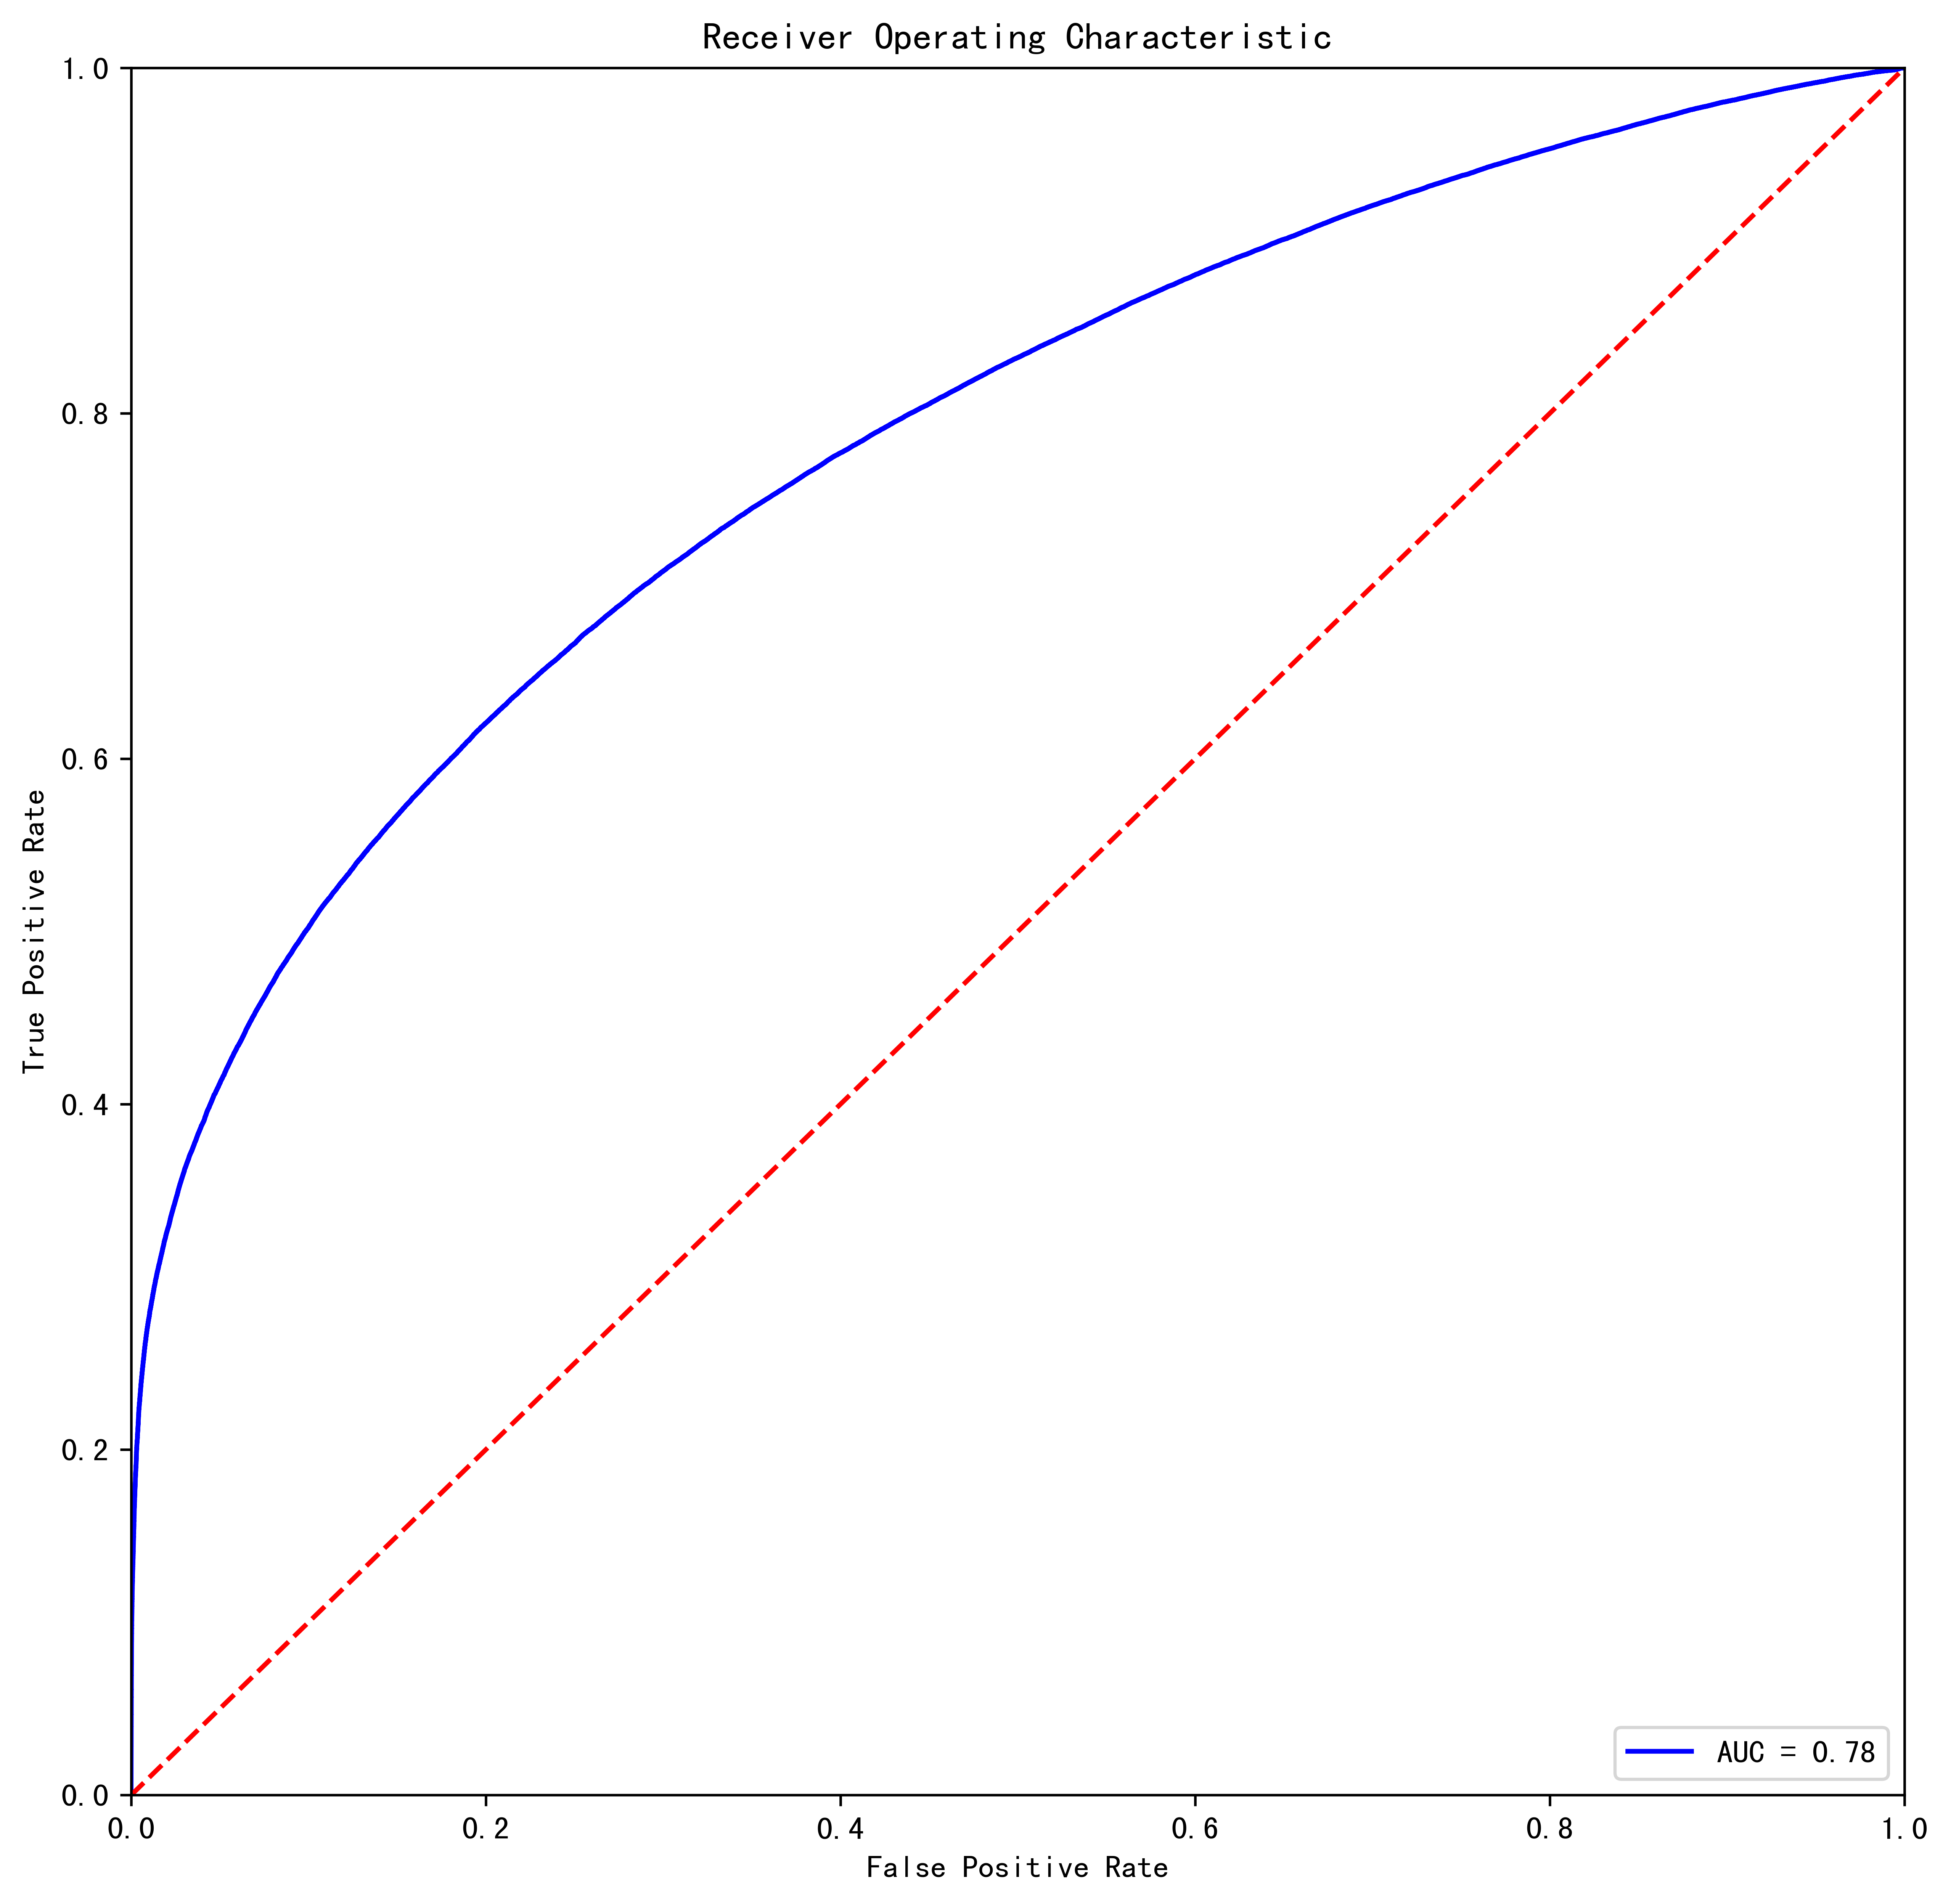

In [56]:
## 获取每一个记录被预测为1的概率
probs1 = m1.predict_proba(x_test)[:,1] 

## threshold为不同的阈值，fpr和tpr为该阈值下的真阳性率和假阳性率
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1)

## 根据fpr和tpr计算auc
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1) 
print(roc_auc1)

## 画图
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--') 

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('lr.pdf',dpi=600)

## KNN Algorithm

In [57]:
from sklearn.neighbors import KNeighborsClassifier
exog = toapply[['VAL','EARN','GROW','LIQ','REV','RETURN','DIV','CSHF','MCR','ACT','PE']]
x_train, x_test, y_train, y_test = train_test_split(exog, toapply['Alpha_1'],stratify=toapply['Alpha_1'], random_state=2023)

In [58]:
p1 = make_pipeline(KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 30, p = 1,n_jobs = -1))
p2 = make_pipeline(KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 30, p = 2,n_jobs = -1))
p3 = make_pipeline(KNeighborsClassifier(algorithm = 'kd_tree', n_jobs = -1,leaf_size = 30, p = 1))
p4 = make_pipeline(KNeighborsClassifier(algorithm = 'kd_tree', n_jobs = -1,leaf_size = 30, p = 2))

## 设置五折交叉验证
kfold = model_selection.KFold(n_splits = 5, random_state = 2023,shuffle = True)

## 运行交叉验证(同时比较运行时间)
%time scores1 = model_selection.cross_val_score(p1,x_train,y_train, cv=kfold, scoring='roc_auc') 
%time scores2 = model_selection.cross_val_score(p2,x_train,y_train, cv=kfold, scoring='roc_auc')
%time scores3 = model_selection.cross_val_score(p3,x_train,y_train, cv=kfold, scoring='roc_auc')
%time scores4 = model_selection.cross_val_score(p4,x_train,y_train, cv=kfold, scoring='roc_auc')


## 查看并比较结果
print("ROC_AUC for model 1: %.10f%%" % (scores1.mean()*100.0))
print("ROC_AUC for model 2: %.10f%%" % (scores2.mean()*100.0))
print("ROC_AUC for model 3: %.10f%%" % (scores3.mean()*100.0))
print("ROC_AUC for model 4: %.10f%%" % (scores4.mean()*100.0))

CPU times: user 8.15 s, sys: 1.28 s, total: 9.43 s
Wall time: 27min 20s
CPU times: user 7.42 s, sys: 685 ms, total: 8.1 s
Wall time: 26min 18s
CPU times: user 7.26 s, sys: 392 ms, total: 7.66 s
Wall time: 2min 26s
CPU times: user 7.26 s, sys: 350 ms, total: 7.61 s
Wall time: 52.5 s
ROC_AUC for model 1: 91.0532908830%
ROC_AUC for model 2: 90.8400082664%
ROC_AUC for model 3: 91.0532908830%
ROC_AUC for model 4: 90.8400082664%


**通过结果可知，p4的运行速度是显著快于其他的，结果虽然不是最优秀但差别不大。故Knn Algorithm应选择kdtree，欧式距离的条件进行模型训练**

[[1.  0. ]
 [0.  1. ]
 [0.2 0.8]
 ...
 [0.8 0.2]
 [0.  1. ]
 [1.  0. ]]
88.96%
84.44%
              precision    recall  f1-score   support

           0   0.862890  0.859742  0.861313    205257
           1   0.820882  0.824725  0.822799    159977

    accuracy                       0.844404    365234
   macro avg   0.841886  0.842233  0.842056    365234
weighted avg   0.844490  0.844404  0.844443    365234

0.9121502014218621


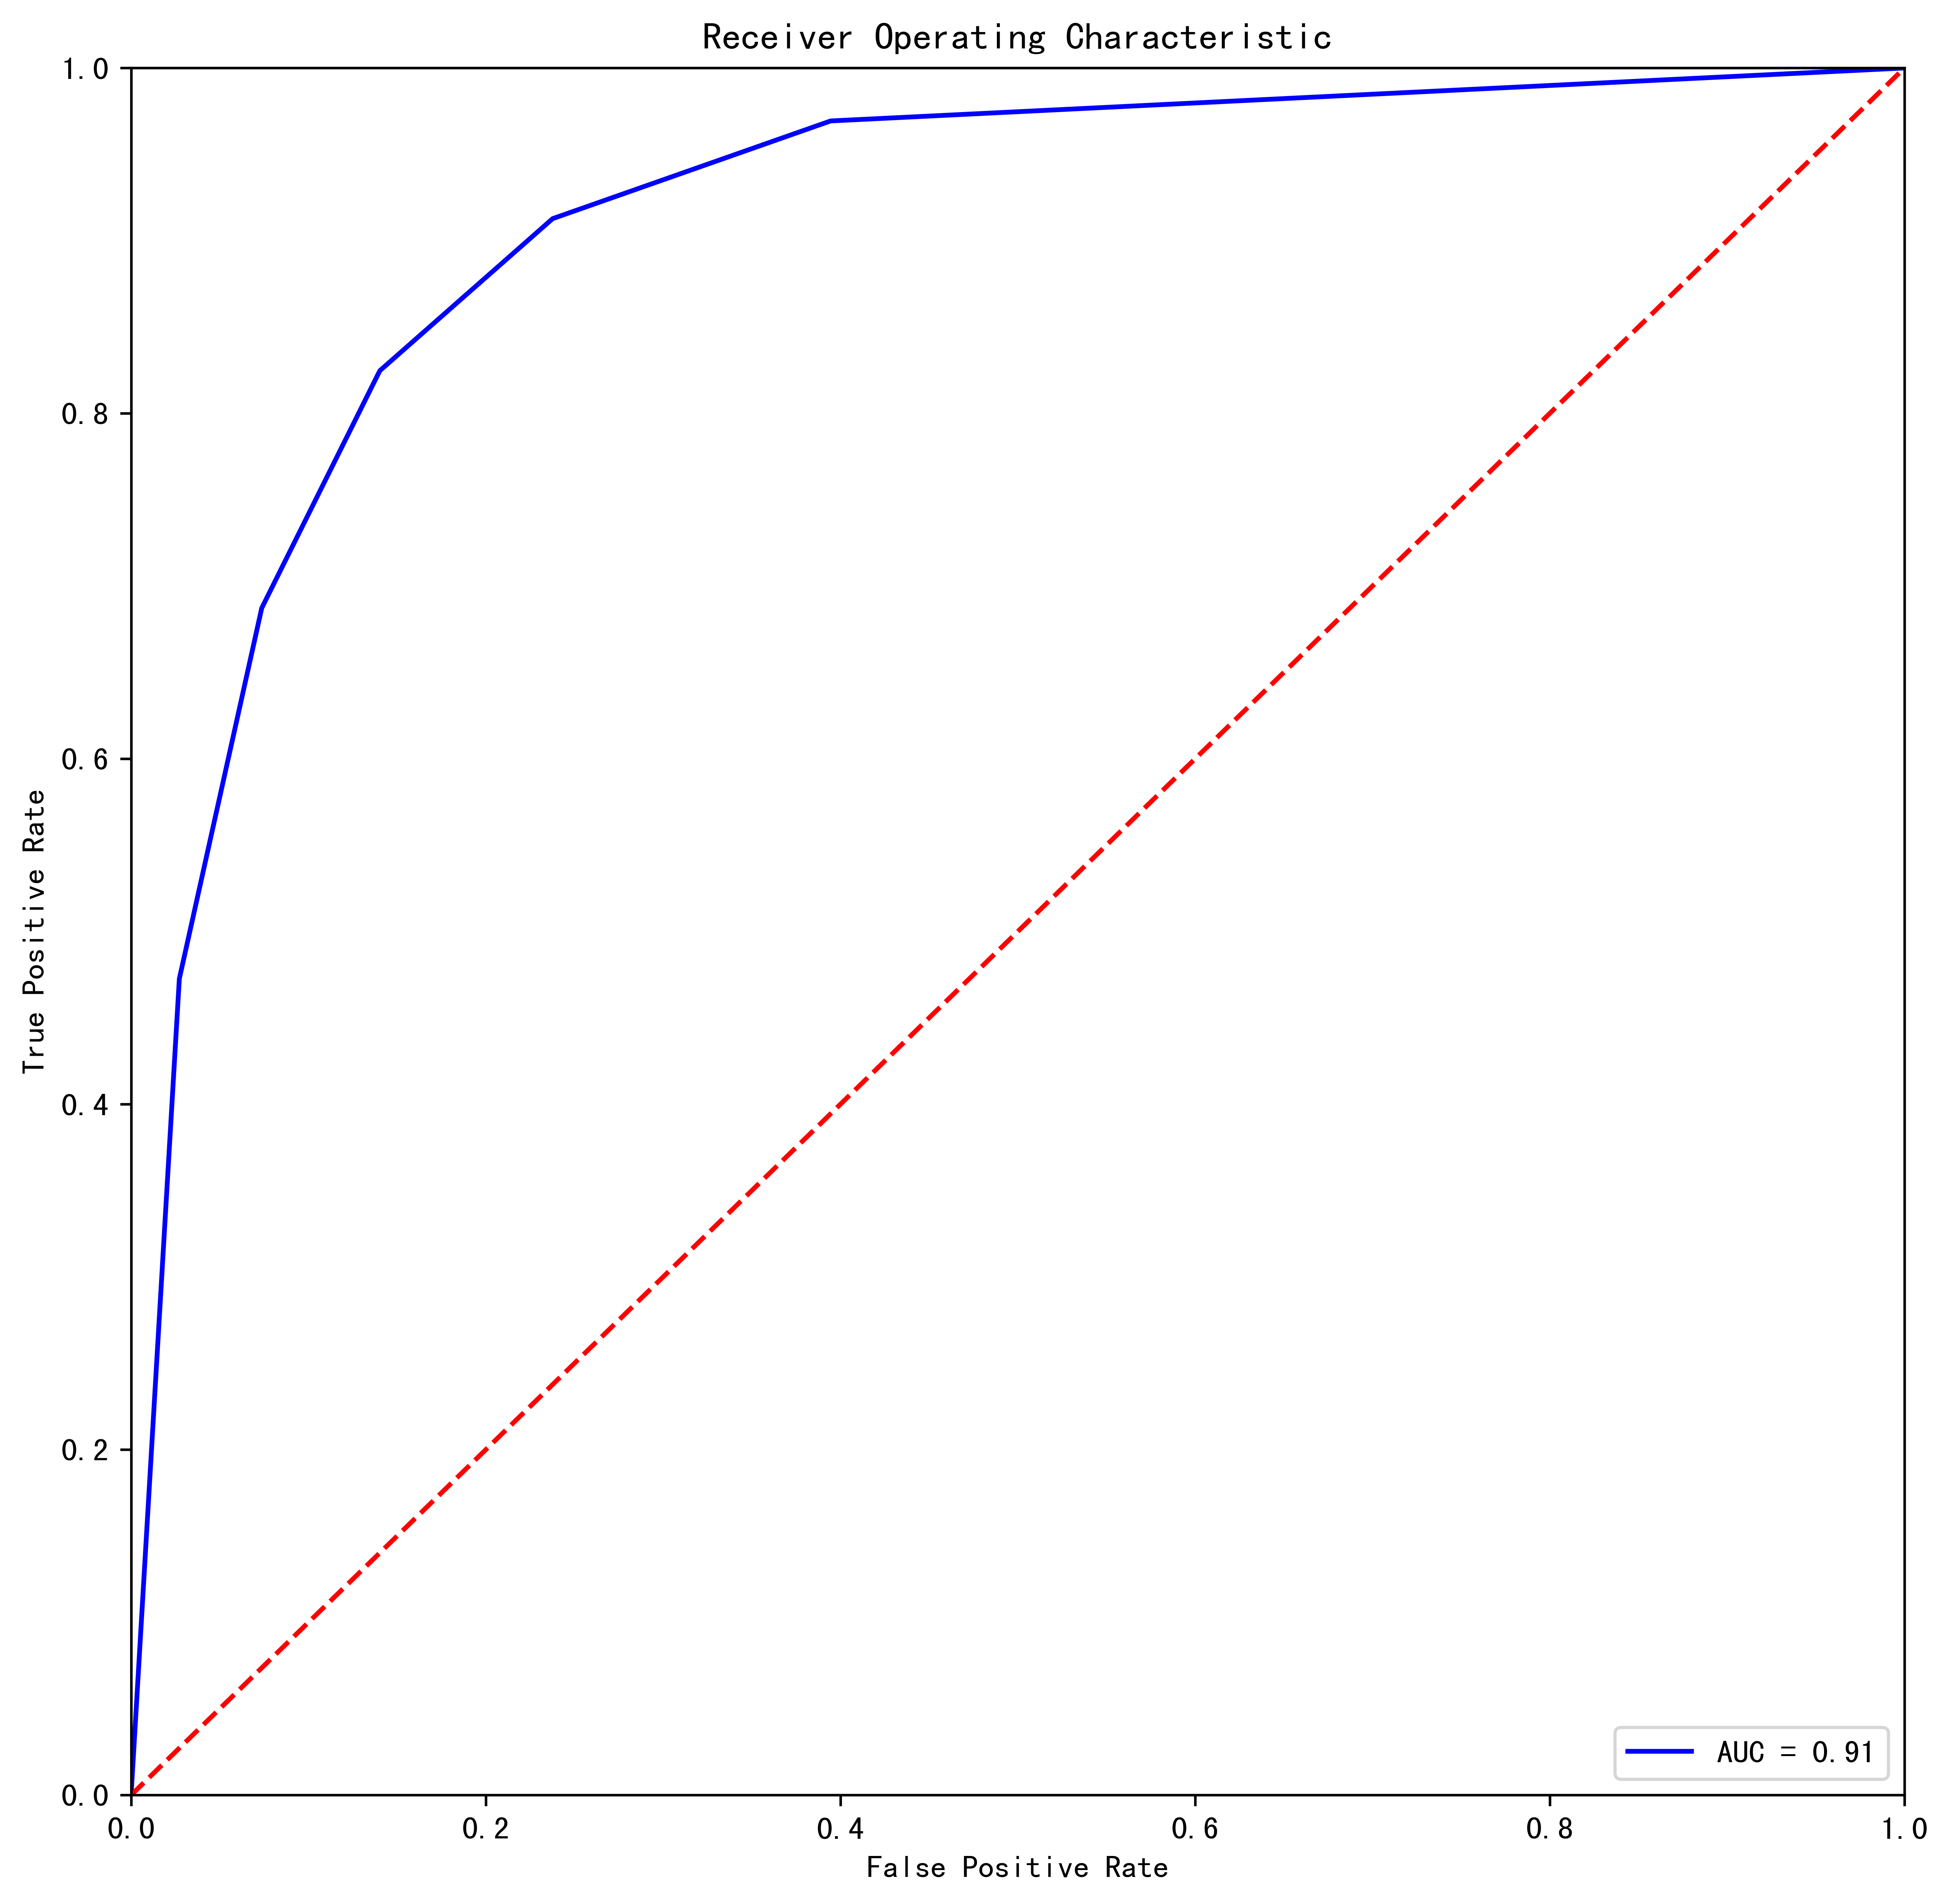

In [60]:
p4 = make_pipeline(KNeighborsClassifier(algorithm = 'kd_tree', n_jobs = -1,leaf_size = 30, p = 2))
m2=p4.fit(x_train,y_train)
pred=m2.predict(x_train)
pred_prob=m2.predict_proba(x_train)
print(pred_prob)

#in-sample accuracy
y_pred=m2.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
print('%.2f'%(accuracy*100)+'%')

#out-sample accuracy
y_pred=m2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('%.2f'%(accuracy*100)+'%')

#confussion matrix
m2_cm = sklearn.metrics.confusion_matrix(y_test,y_pred)

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel() 

#classification report
report=sklearn.metrics.classification_report(y_test,y_pred,digits=6)
print(report)

#roc auc curve
probs1 = m2.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1)
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1)
print(roc_auc1)
plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.savefig('knn.pdf',dpi=600)

## Decision Tree Algorithm

0.8588023007402705


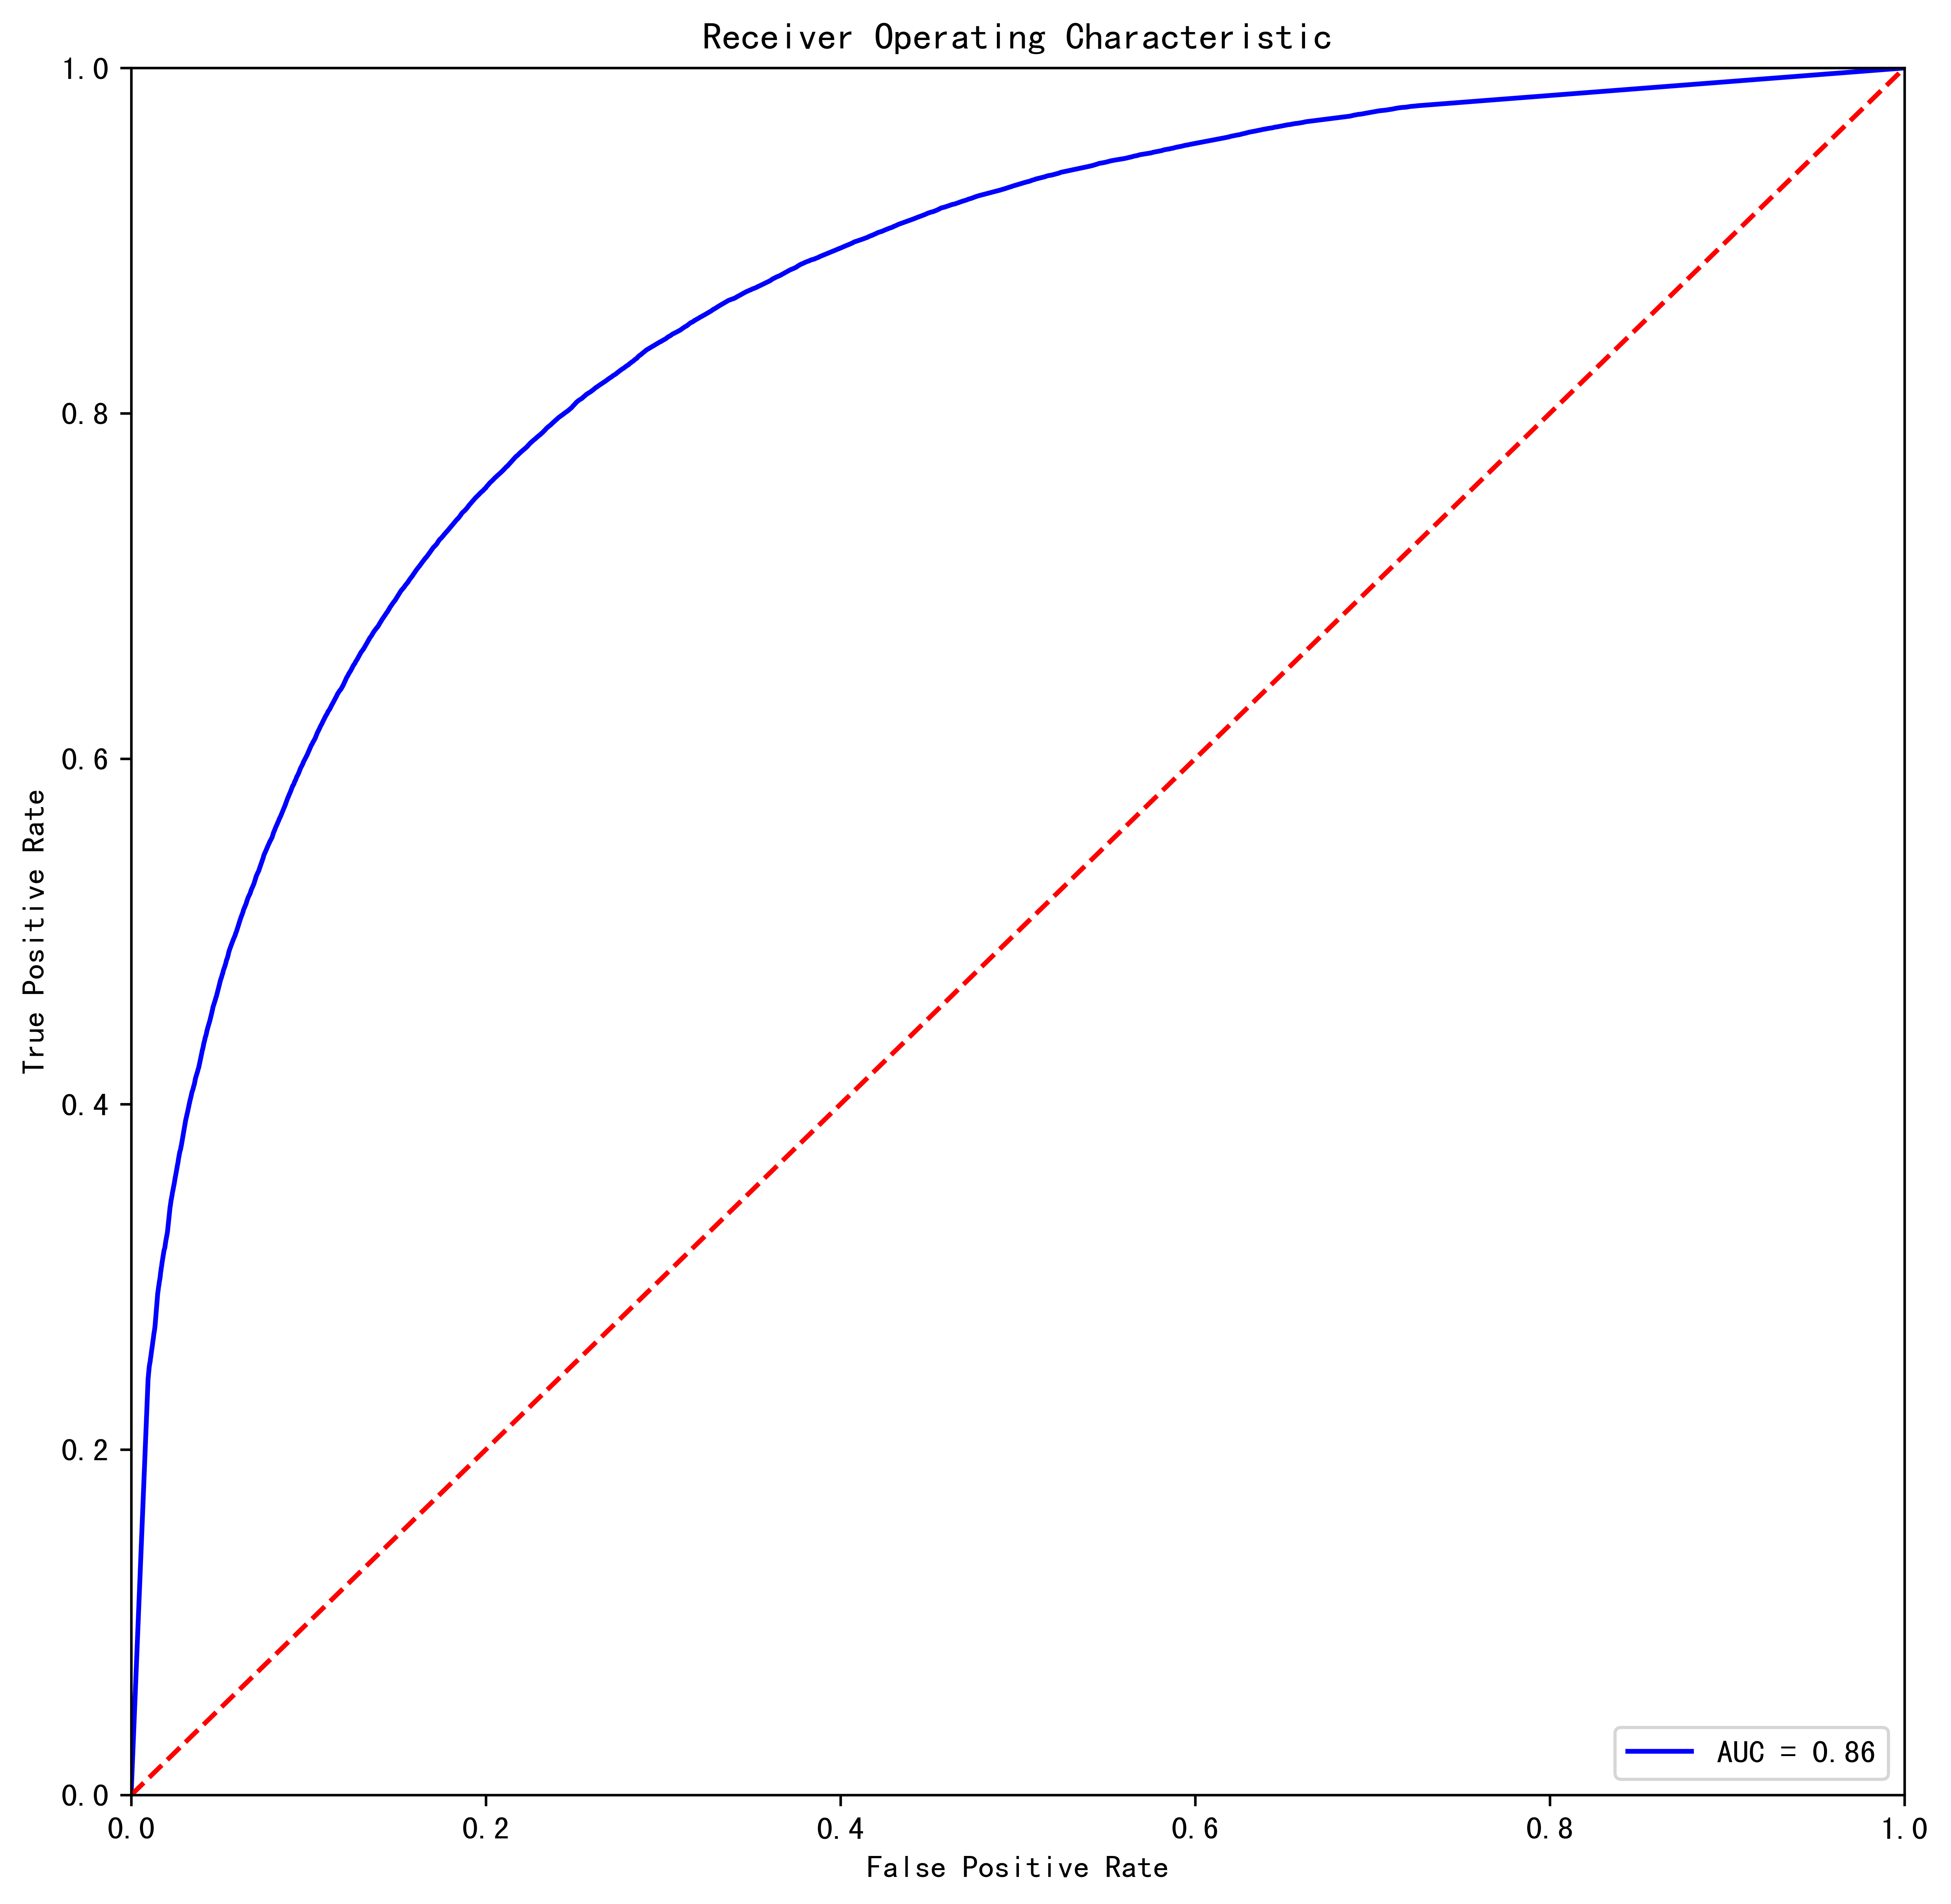

In [61]:
from sklearn import tree

exog=toapply[['VAL','EARN','GROW','LIQ','REV','RETURN','DIV','CSHF','MCR','ACT','PE']]
x_train, x_test, y_train, y_test=train_test_split(exog, toapply['Alpha_1'],test_size = 0.2, random_state=2023)
p=make_pipeline(tree.DecisionTreeClassifier(
        random_state=2021,
        max_depth=27,
        min_samples_leaf=27,
        class_weight='balanced'))
m3 = p.fit(x_train,y_train)

probs=m3.predict_proba(x_test)[:,1]
fpr1, tpr1, threshold1 = sklearn.metrics.roc_curve(y_test, probs)
roc_auc1=sklearn.metrics.auc(fpr1, tpr1)
print(roc_auc1)


plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('tree.pdf',dpi=600)

## AdaBoost- LR

              precision    recall  f1-score   support

           0   0.700066  0.892895  0.784809    205257
           1   0.787471  0.509173  0.618457    159977

    accuracy                       0.724820    365234
   macro avg   0.743768  0.701034  0.701633    365234
weighted avg   0.738350  0.724820  0.711945    365234

0.7812405966461057


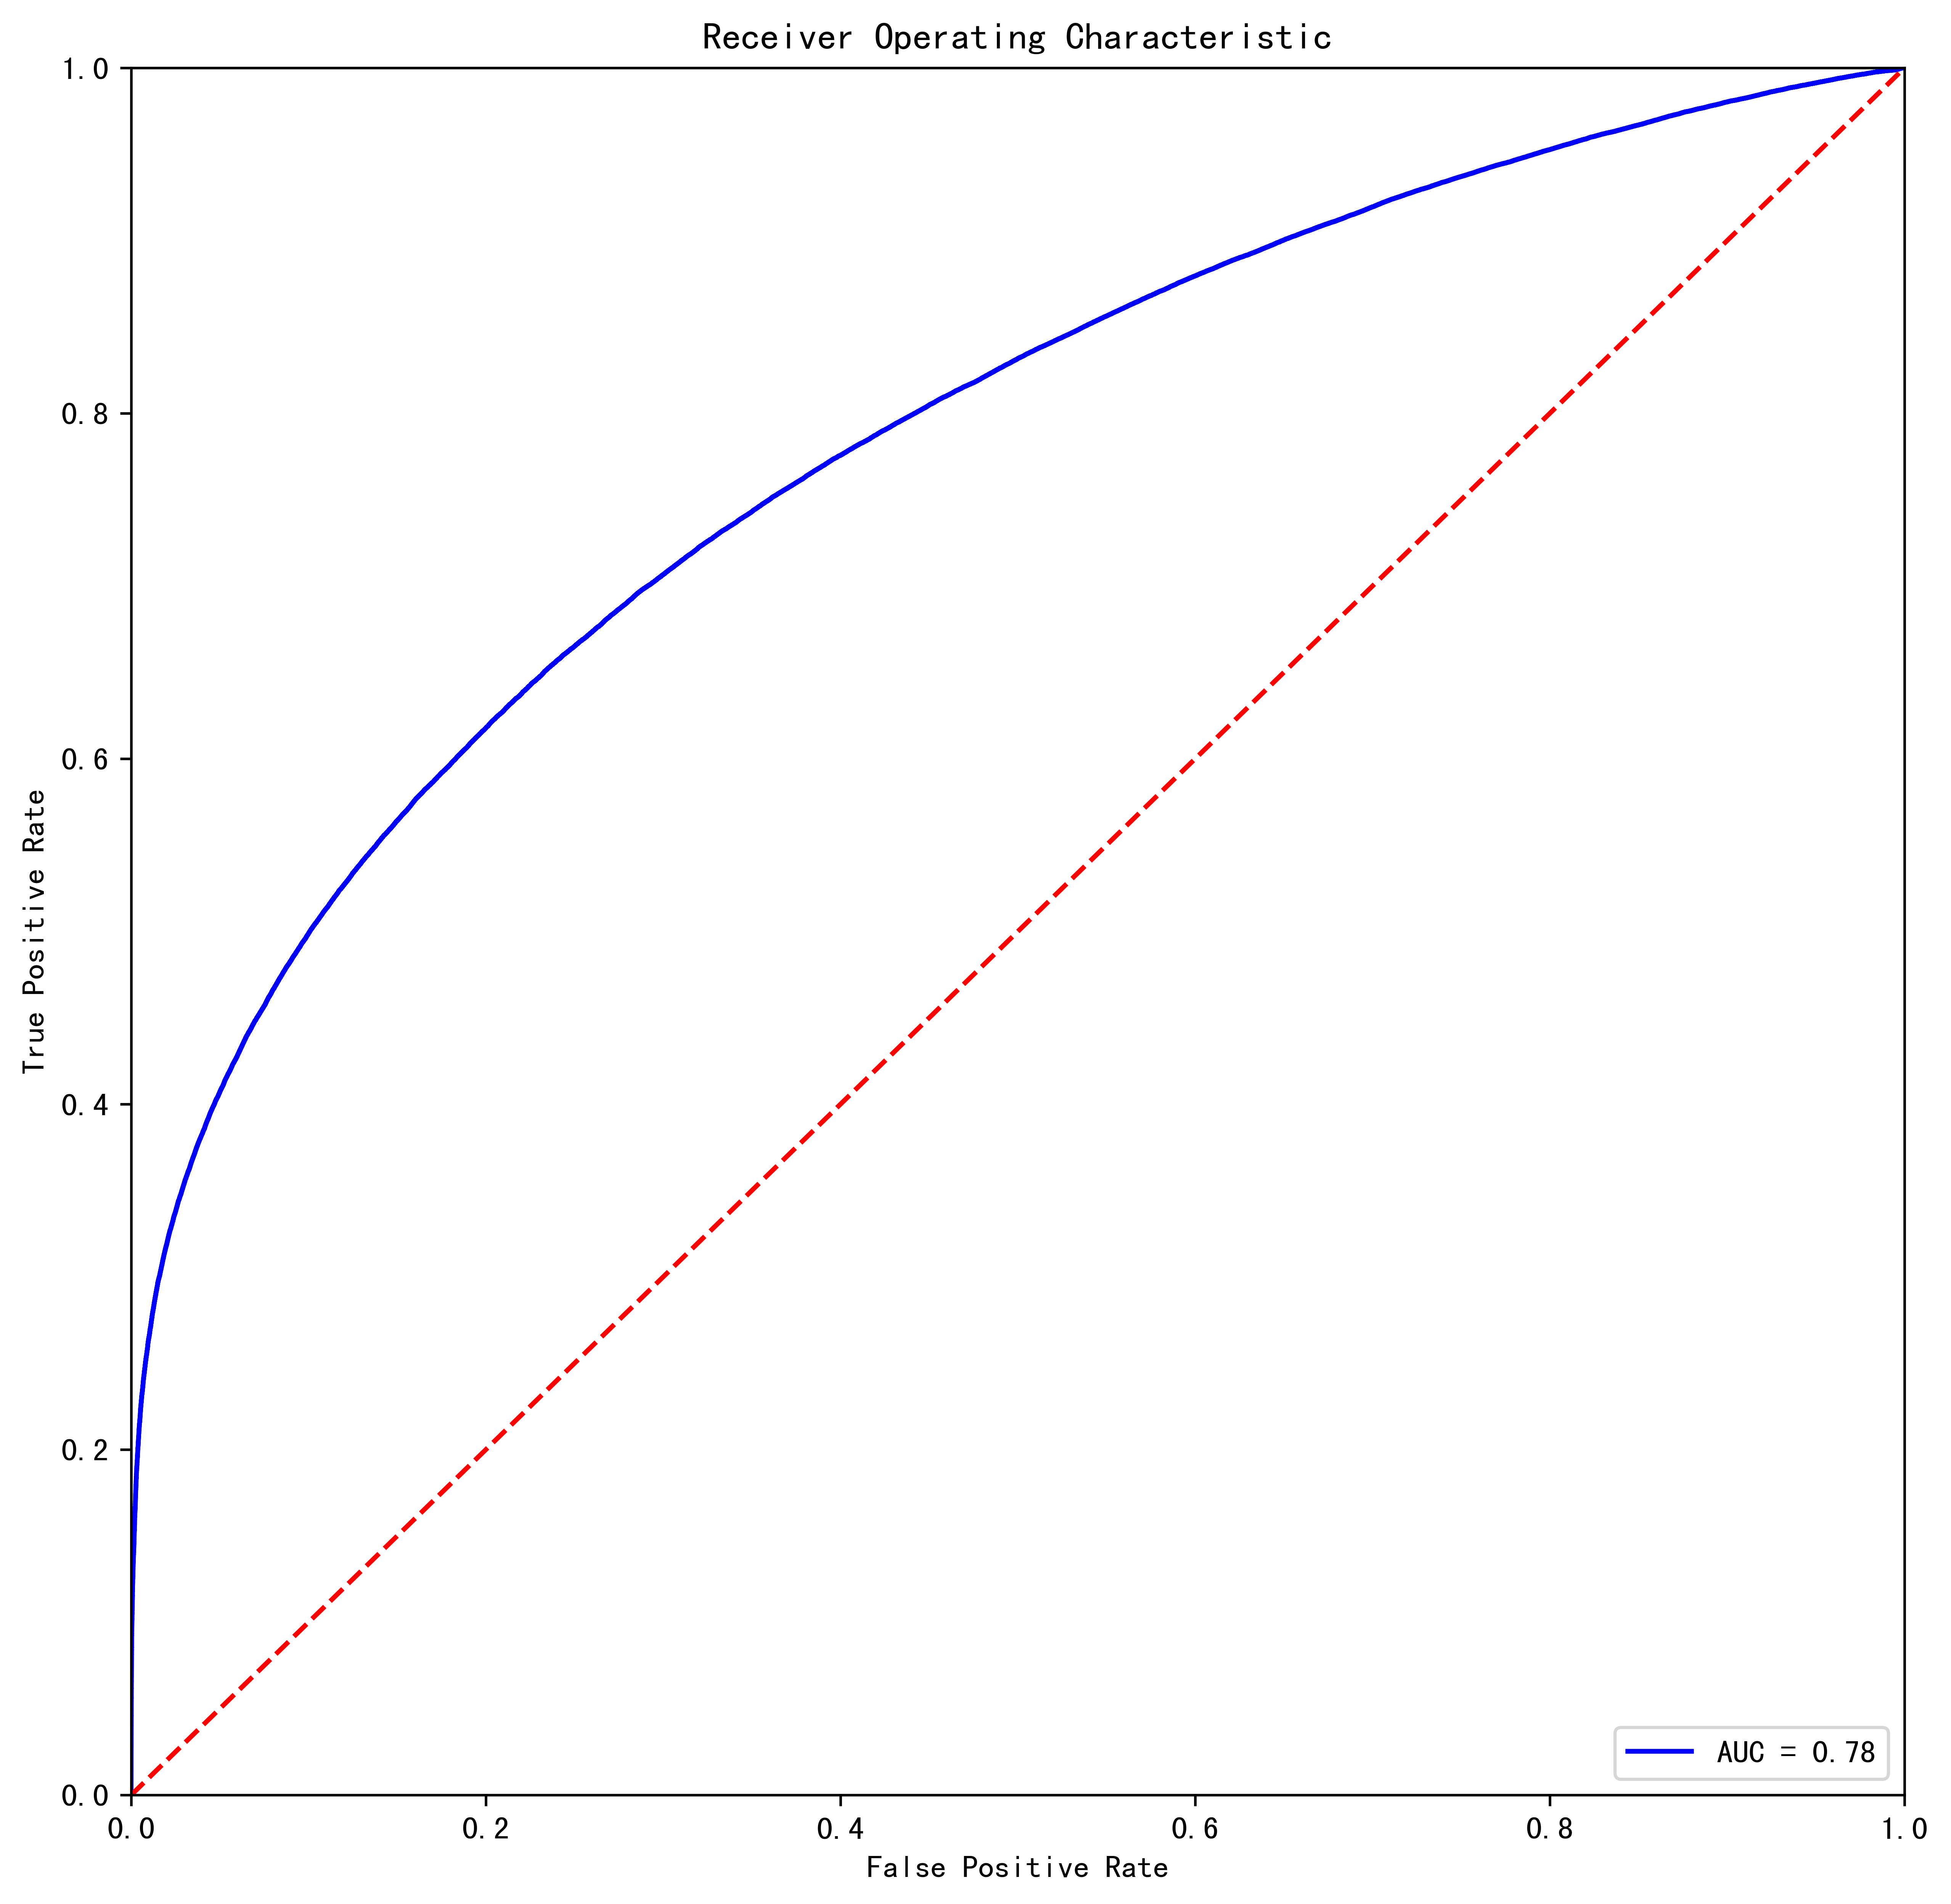

In [63]:
from sklearn.ensemble import AdaBoostClassifier
x_train, x_test, y_train, y_test=train_test_split(exog, toapply['Alpha_1'],stratify=toapply['Alpha_1'], random_state=2023)

base=LogisticRegression(max_iter=1000,random_state=2023,C=10)

ada=AdaBoostClassifier(base_estimator=base,n_estimators=50,learning_rate=0.001,algorithm='SAMME.R')
#太慢了手动试了很多参数1 0.2 0.5 0.01 0.1 等，这个最好；n——estimators 变化不是很大


ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

sklearn.metrics.confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tp/(tp+fn) #召回率
#计算召回率
sklearn.metrics.recall_score(y_test,y_pred) 
#计算精确率
sklearn.metrics.precision_score(y_test,y_pred)
#统计各项指标(digits表示保留几位小数)
report=sklearn.metrics.classification_report(y_test,y_pred,digits=6)
print(report)
#FPR,TPR和AUC的计算
probs1 = ada.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1) 
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1) 
print(roc_auc1)

#绘制roc曲线
plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('adalr.pdf',dpi=600)

              precision    recall  f1-score   support

           0   0.835470  0.849550  0.842451    205257
           1   0.802700  0.785344  0.793927    159977

    accuracy                       0.821427    365234
   macro avg   0.819085  0.817447  0.818189    365234
weighted avg   0.821116  0.821427  0.821197    365234

0.8993420587001197


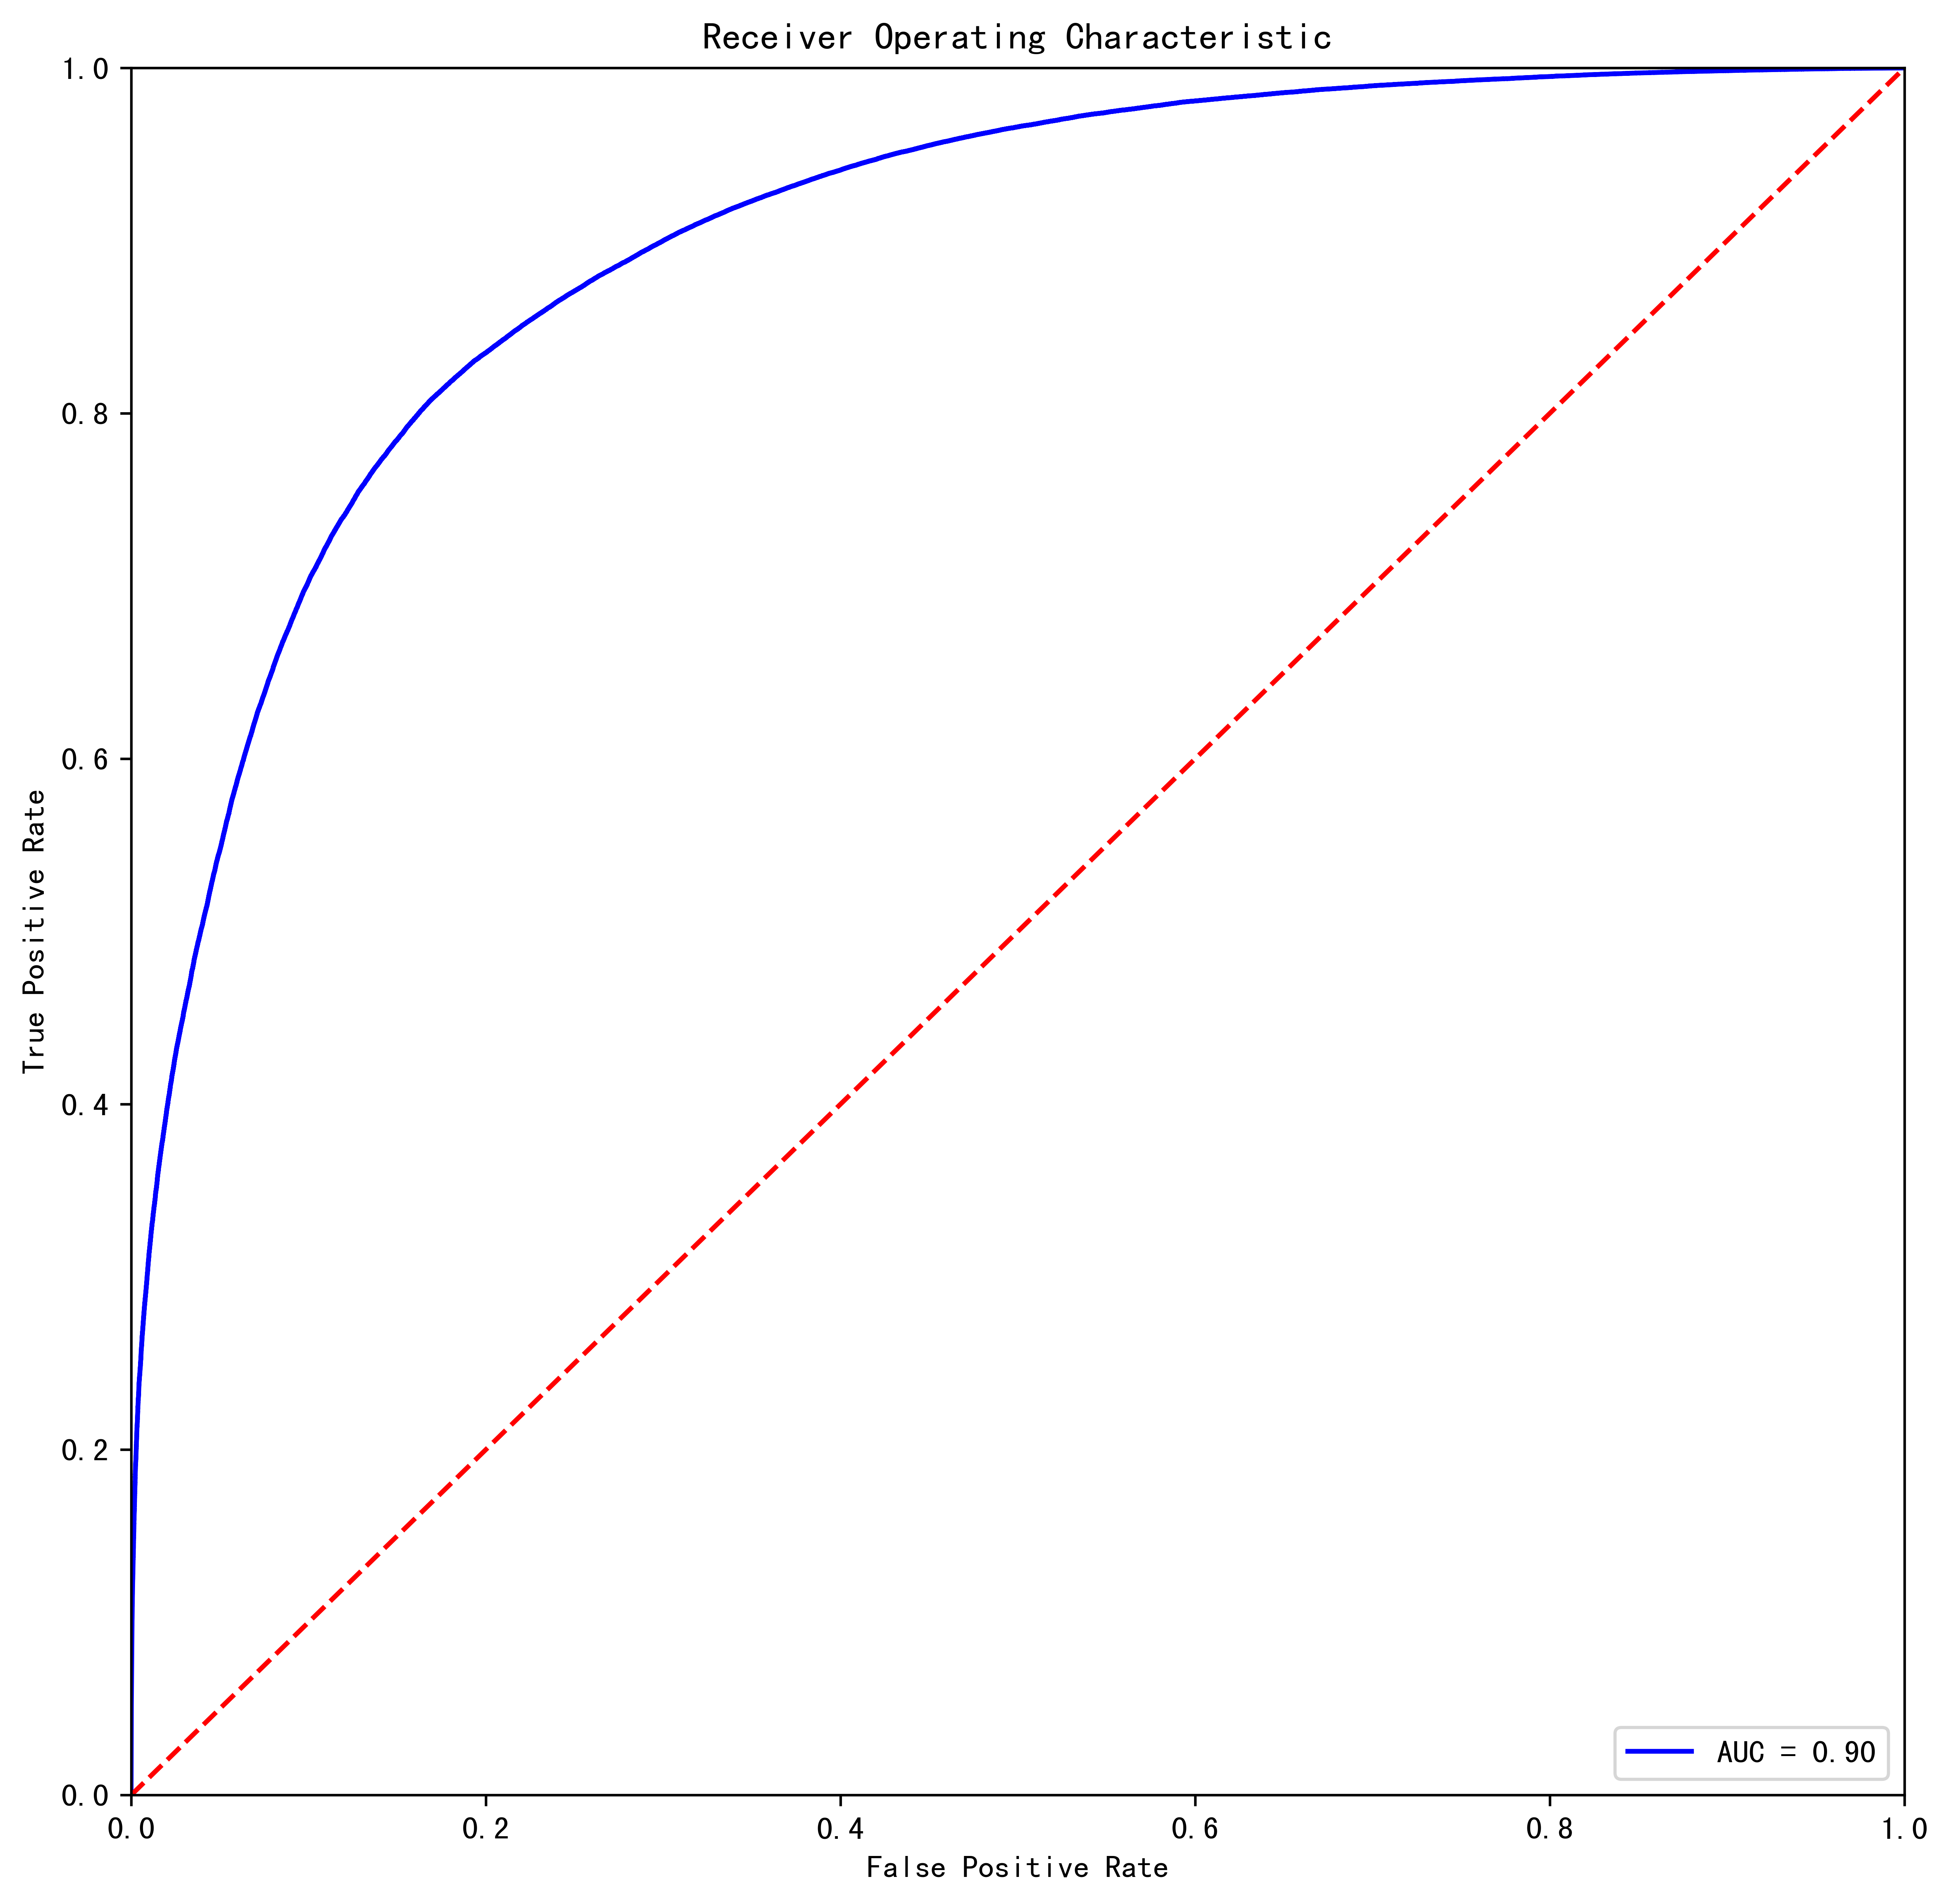

In [64]:
x_train, x_test, y_train, y_test=train_test_split(exog, toapply['Alpha_1'],stratify=toapply['Alpha_1'], random_state=2023)

base=tree.DecisionTreeClassifier(criterion='gini'
                            ,max_depth=27
                            ,min_samples_leaf=27
                            ,class_weight='balanced'
                            ,random_state=2023)
ada=AdaBoostClassifier(base_estimator=base,n_estimators=50,learning_rate=0.001,algorithm='SAMME.R')

ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

sklearn.metrics.confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tp/(tp+fn) #召回率
#计算召回率
sklearn.metrics.recall_score(y_test,y_pred) 
#计算精确率
sklearn.metrics.precision_score(y_test,y_pred)
#统计各项指标(digits表示保留几位小数)
report=sklearn.metrics.classification_report(y_test,y_pred,digits=6)
print(report)
#FPR,TPR和AUC的计算
probs1 = ada.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1) 
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1) 
print(roc_auc1)

#绘制roc曲线
plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('adadt.pdf',dpi=600)


## Bagging

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


base1 = DecisionTreeClassifier(criterion='gini'
                            ,max_depth=27
                            ,min_samples_leaf=27
                            ,class_weight='balanced'
                            ,random_state=2023)

base2 = LogisticRegression(max_iter=1000,random_state=2023,C=10)

base3 = KNeighborsClassifier(algorithm='kd_tree',leaf_size=30,n_jobs=-1,p=2)

x_train, x_test, y_train, y_test=train_test_split(exog, toapply['Alpha_1'],stratify=toapply['Alpha_1'], random_state=2023)

### Decision Tree Bagging

CPU times: user 18.3 s, sys: 874 ms, total: 19.2 s
Wall time: 3min 24s
              precision    recall  f1-score   support

           0   0.842295  0.826716  0.834433    209125
           1   0.773480  0.792645  0.782945    156109

    accuracy                       0.812153    365234
   macro avg   0.807888  0.809680  0.808689    365234
weighted avg   0.812882  0.812153  0.812426    365234

0.8096804808211829


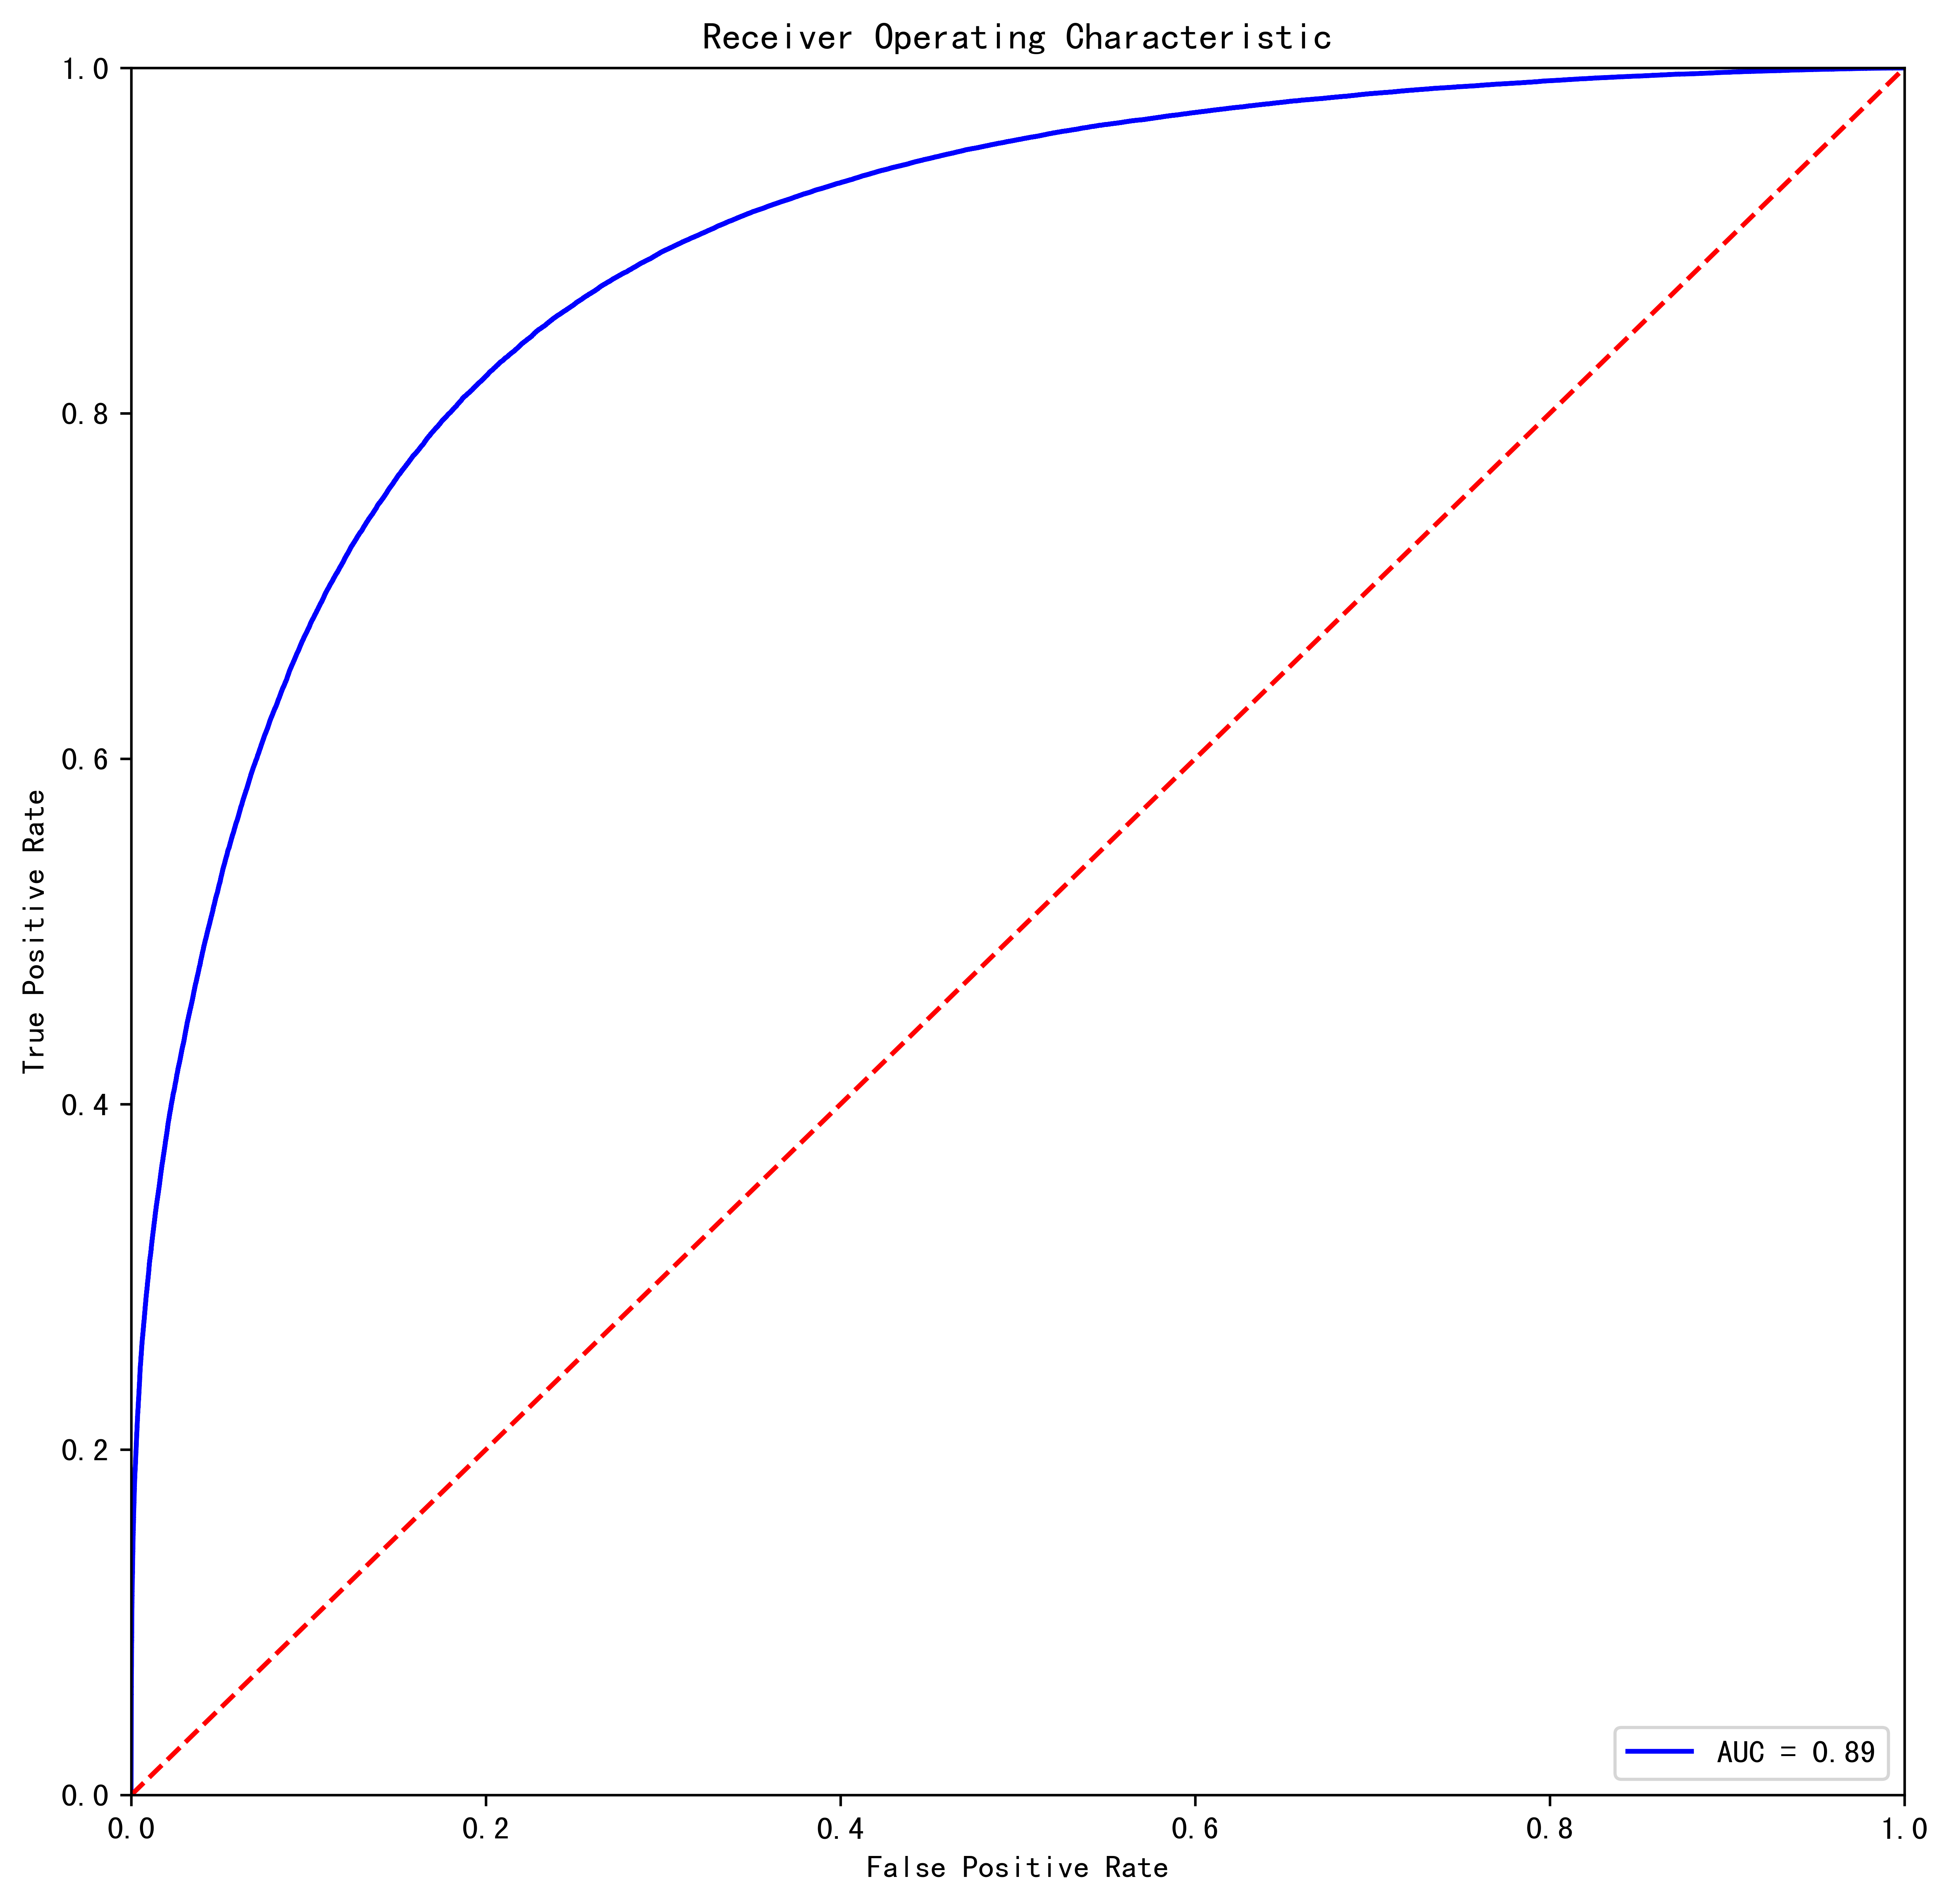

In [66]:
clf = BaggingClassifier(base_estimator=base1, n_estimators=100, 
                        max_samples=0.5, bootstrap=True,
                        n_jobs=-1, oob_score=True, random_state=2023)
%time model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)

report_bagging_dt=classification_report(y_pred,y_test,digits=6)
print(report_bagging_dt)
print(roc_auc_score(y_pred,y_test))

probs1 = clf.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1) 
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1) 

plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('bagdt.pdf',dpi=600)

### LR Bagging

CPU times: user 13.3 s, sys: 26.7 s, total: 40 s
Wall time: 52.8 s
              precision    recall  f1-score   support

           0   0.824883  0.723090  0.770640    234152
           1   0.594698  0.725790  0.653737    131082

    accuracy                       0.724059    365234
   macro avg   0.709790  0.724440  0.712188    365234
weighted avg   0.742270  0.724059  0.728683    365234

0.7244400465114068


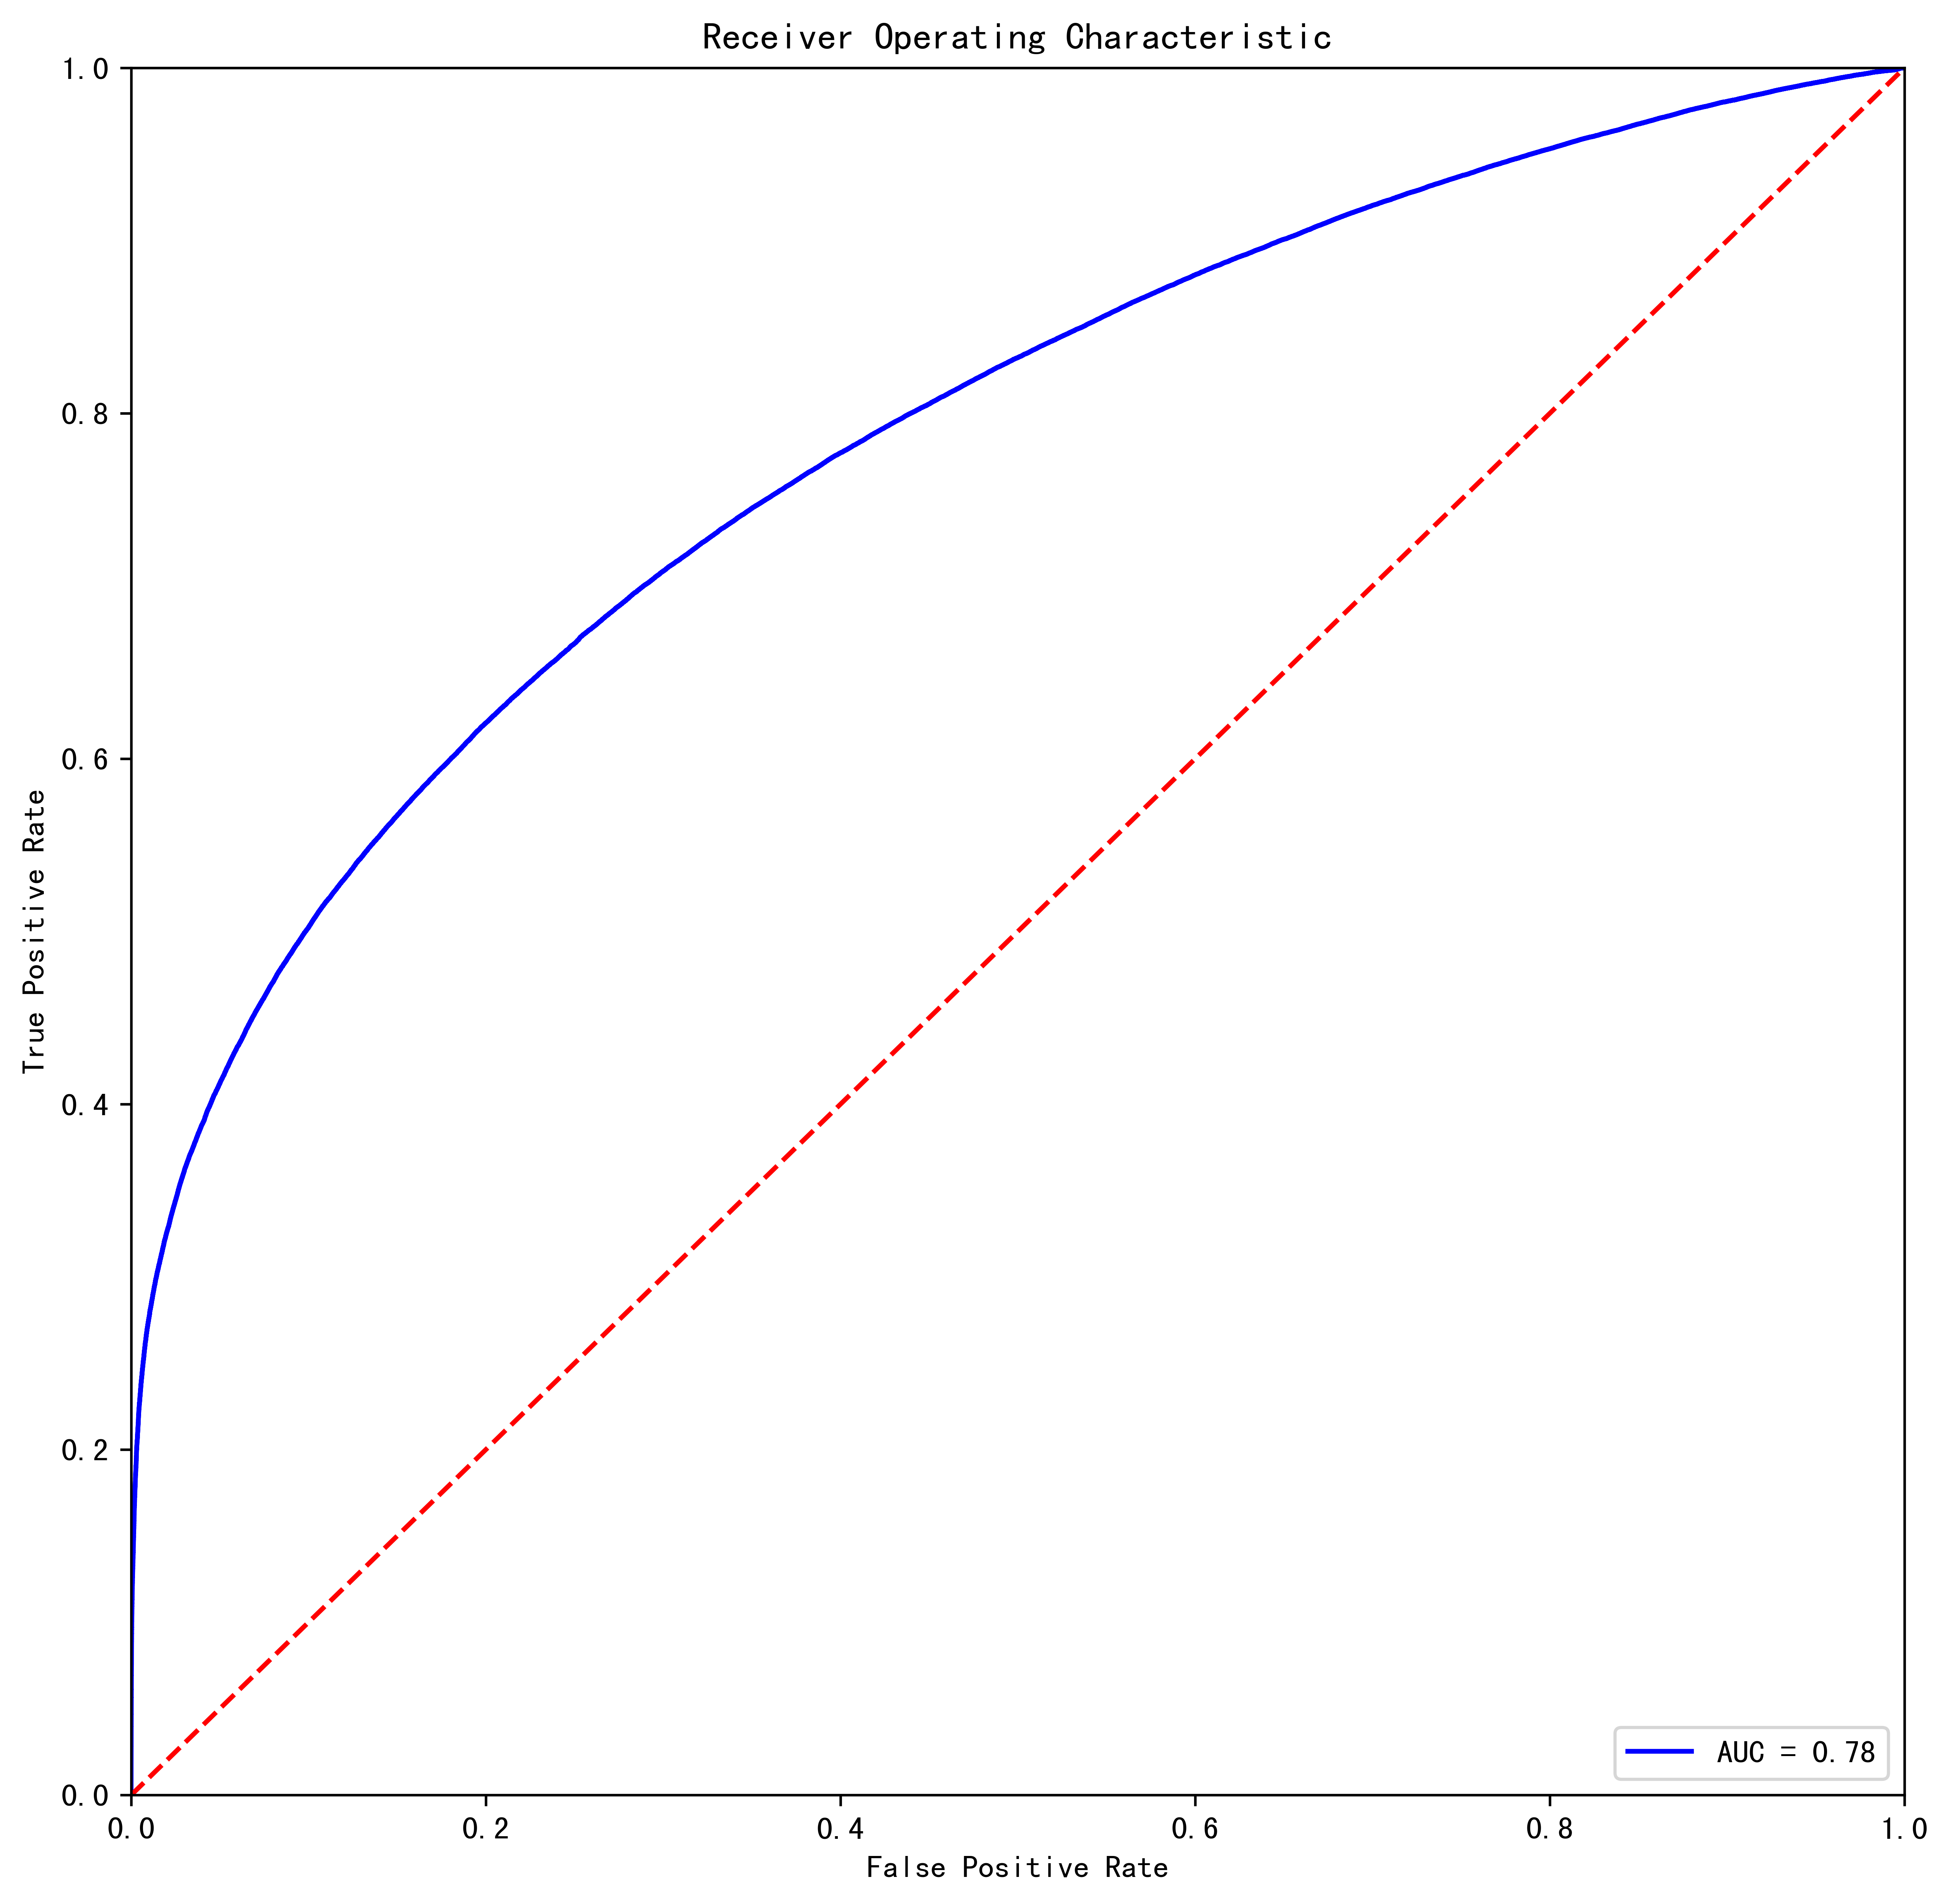

In [67]:
clf = BaggingClassifier(base_estimator=base2, n_estimators=100, 
                        max_samples=0.5, bootstrap=True,
                        n_jobs=-1, oob_score=True, random_state=2023)
%time model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)

report_bagging_lr=classification_report(y_pred,y_test,digits=6)
print(report_bagging_lr)
print(roc_auc_score(y_pred,y_test))

probs1 = clf.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1) 
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1) 

plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('baglr.pdf',dpi=600)


## Random Forest

              precision    recall  f1-score   support

           0   0.729174  0.790433  0.758569    205257
           1   0.698633  0.623327  0.658835    159977

    accuracy                       0.717239    365234
   macro avg   0.713904  0.706880  0.708702    365234
weighted avg   0.715797  0.717239  0.714884    365234

0.7786780439352577


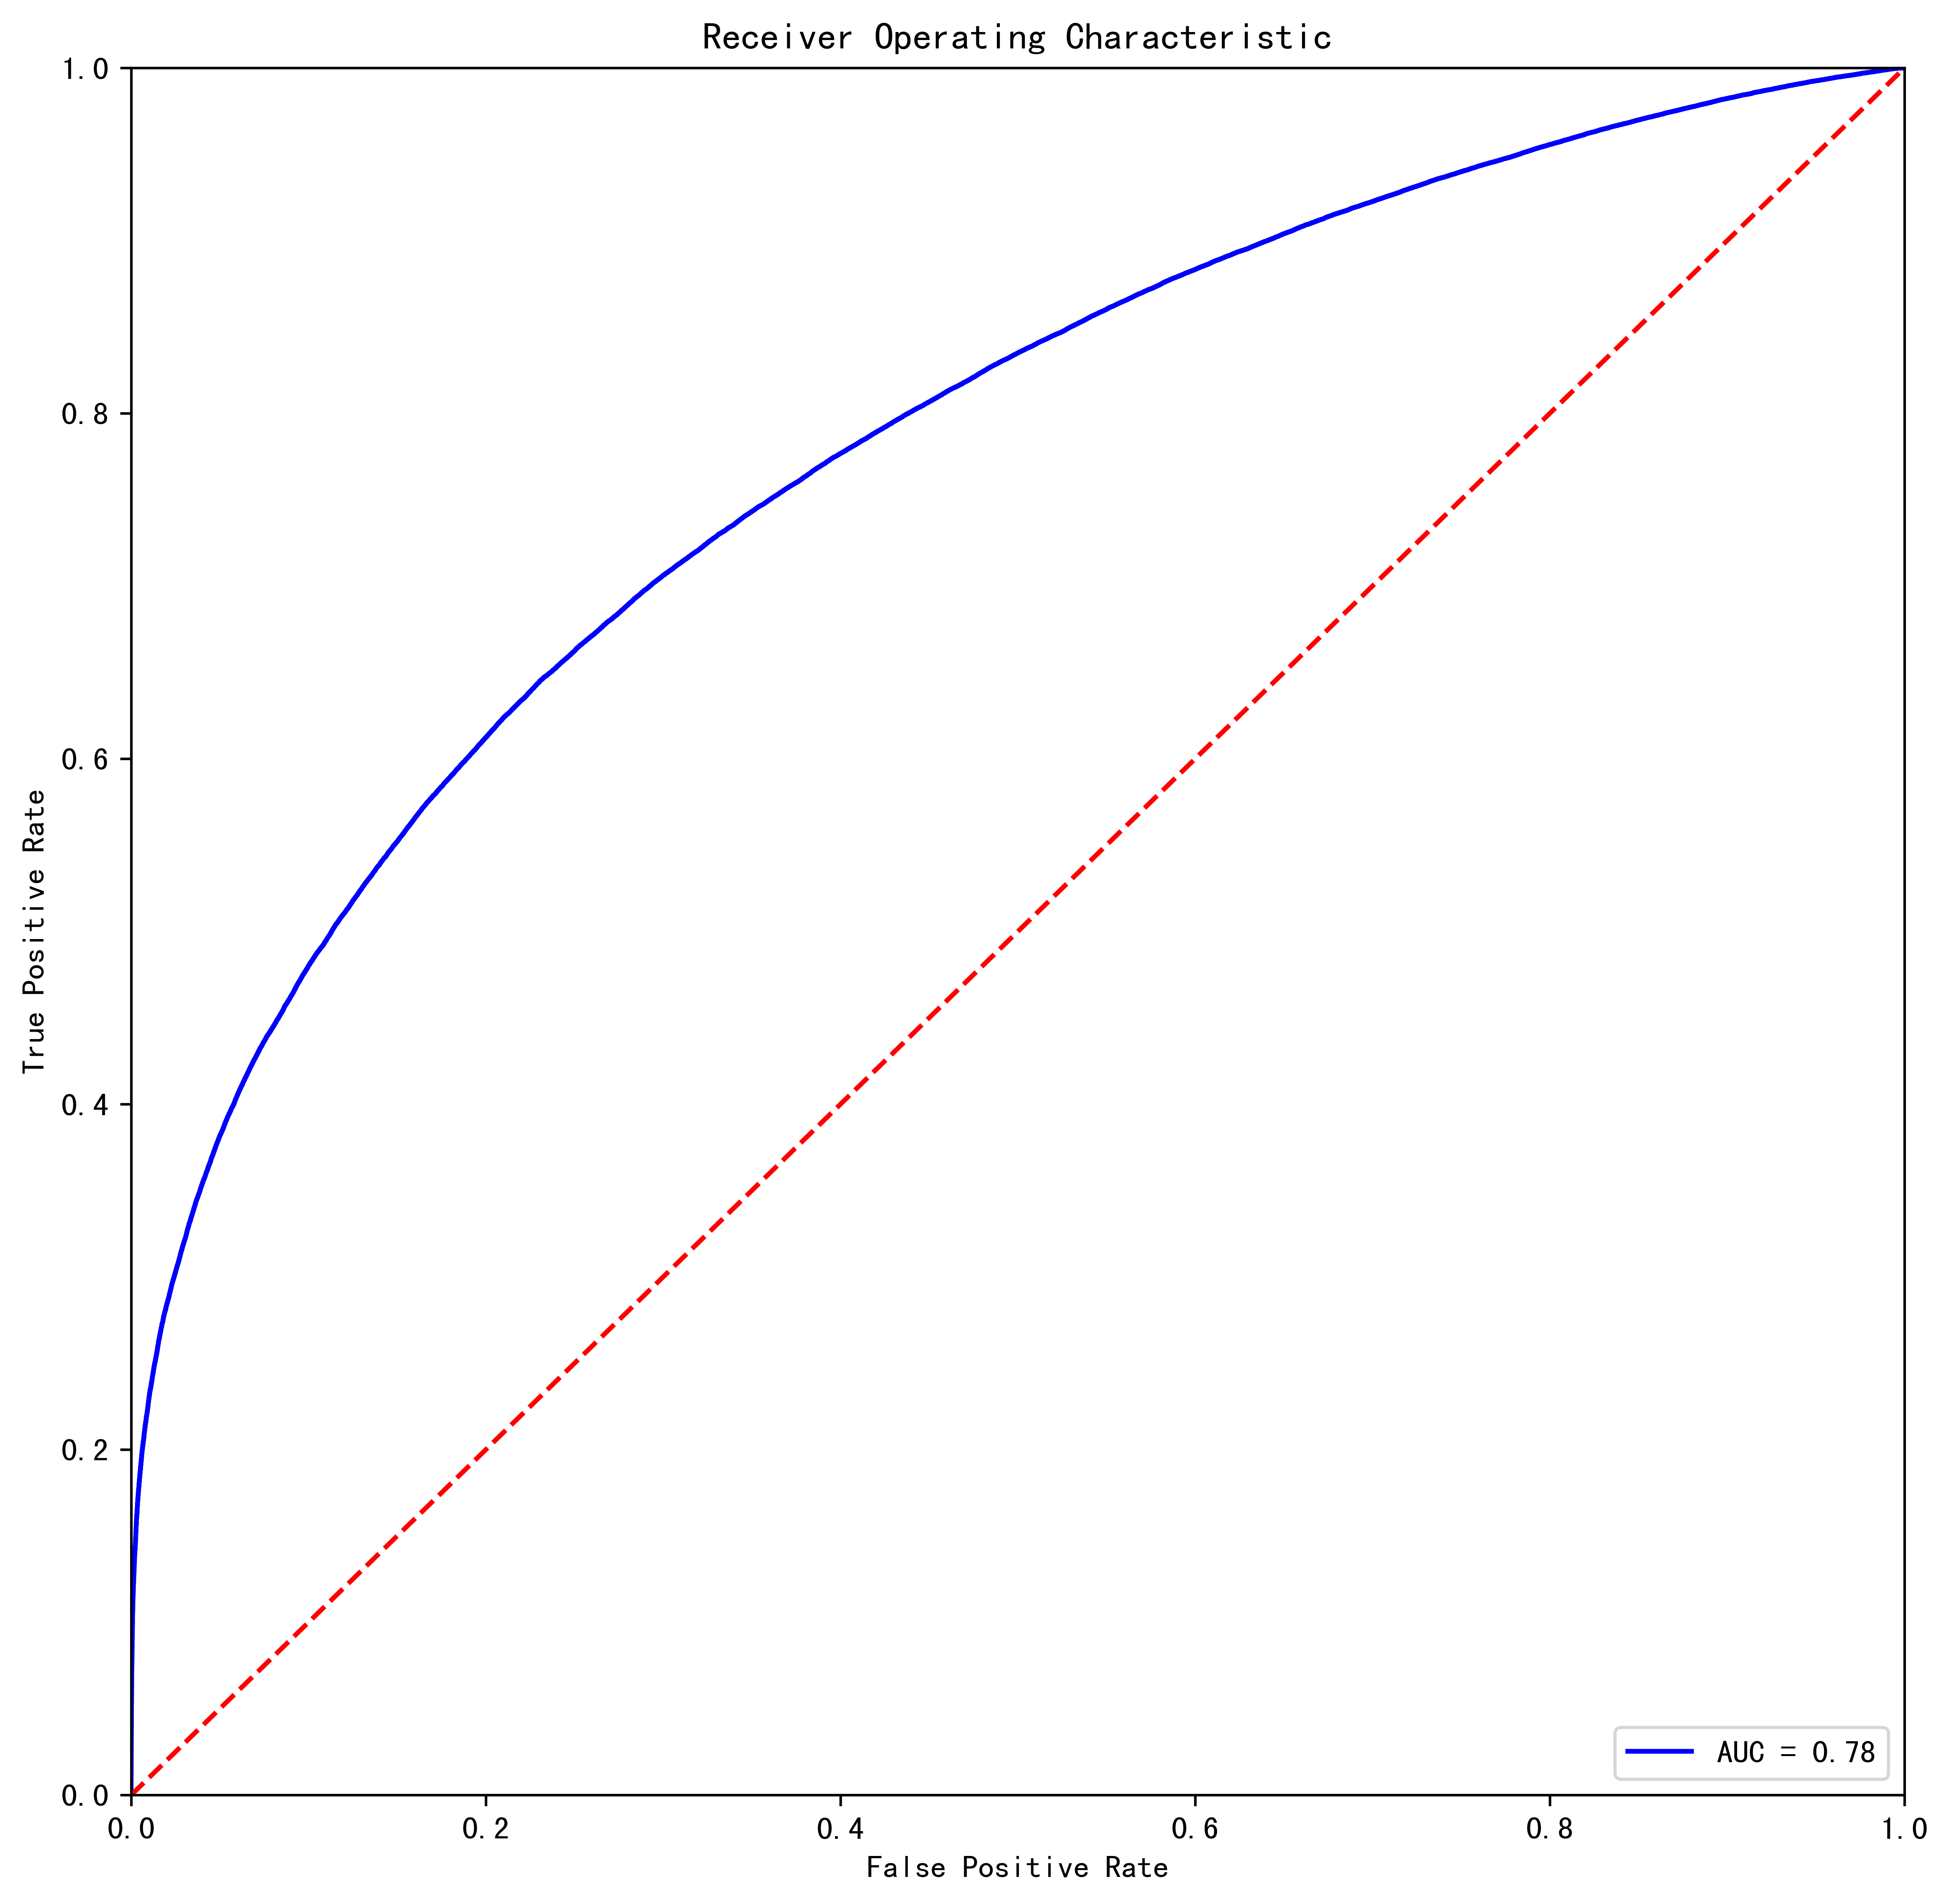

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

#调参
'''
p=make_pipeline(RandomForestClassifier(n_estimators=100, criterion='gini'
                           ,max_depth=6, min_samples_leaf=50
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2023))

p1=make_pipeline(RandomForestClassifier(n_estimators=50, criterion='gini'
                           ,max_depth=6, min_samples_leaf=50
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2023))

p2=make_pipeline(RandomForestClassifier(n_estimators=150, criterion='gini'
                           ,max_depth=6, min_samples_leaf=50
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2023))

p3=make_pipeline(RandomForestClassifier(n_estimators=200, criterion='gini'
                           ,max_depth=6, min_samples_leaf=50
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2023))

kfold = model_selection.KFold(n_splits=10, random_state=2023,shuffle=True)
scores1=model_selection.cross_val_score(p,x_train,y_train, cv=kfold, scoring='roc_auc') 
scores2=model_selection.cross_val_score(p1,x_train,y_train, cv=kfold, scoring='roc_auc')
scores3=model_selection.cross_val_score(p2,x_train,y_train, cv=kfold, scoring='roc_auc') 
scores4=model_selection.cross_val_score(p3,x_train,y_train, cv=kfold, scoring='roc_auc')

print("ROC_AUC for model : %.2f%%" % (scores1.mean()*100.0))
print("ROC_AUC for model 1: %.2f%%" % (scores2.mean()*100.0))
print("ROC_AUC for model 2: %.2f%%" % (scores3.mean()*100.0))
print("ROC_AUC for model 3: %.2f%%" % (scores4.mean()*100.0))

'''
#结果显示n_estimator = 200最好但区别很小，于是选择用100作为n_estimator
#由于数据量大，利用Grid Search调其他超参数无法得到结果，于是选择手动调参。
'''
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
clf=RandomForestClassifier(n_estimators=100, criterion='gini'
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2021)
param_grid={'max_depth':[3,5,7],'min_samples_leaf':[50,75]}
kfold = model_selection.KFold(n_splits=3, random_state=2021,shuffle=True)
gs = GridSearchCV(clf, param_grid, cv = kfold, n_jobs = 10,scoring='roc_auc')
gs.fit(x_train,y_train)
print('最优参数: ',gs.best_params_)
print('最佳性能: ', gs.best_score_)
'''

#运用：

clf=RandomForestClassifier(n_estimators=200, criterion='gini'
                           ,max_depth=6, min_samples_leaf=50
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2023)
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)


sklearn.metrics.confusion_matrix(y_test,y_pred)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tp/(tp+fn) 
sklearn.metrics.recall_score(y_test,y_pred) 
sklearn.metrics.precision_score(y_test,y_pred)
report=sklearn.metrics.classification_report(y_test,y_pred,digits=6)
print(report)

#FPR,TPR和AUC的计算
probs1 = clf.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1) 
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1)
print(roc_auc1)

#绘制roc曲线
plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('rf.pdf',dpi=600)

## Stacking

CPU times: user 2.25 s, sys: 5.15 s, total: 7.4 s
Wall time: 11min
              precision    recall  f1-score   support

           0   0.865218  0.859003  0.862099    206742
           1   0.817786  0.825449  0.821600    158492

    accuracy                       0.844442    365234
   macro avg   0.841502  0.842226  0.841849    365234
weighted avg   0.844635  0.844442  0.844525    365234

0.8422258058324052


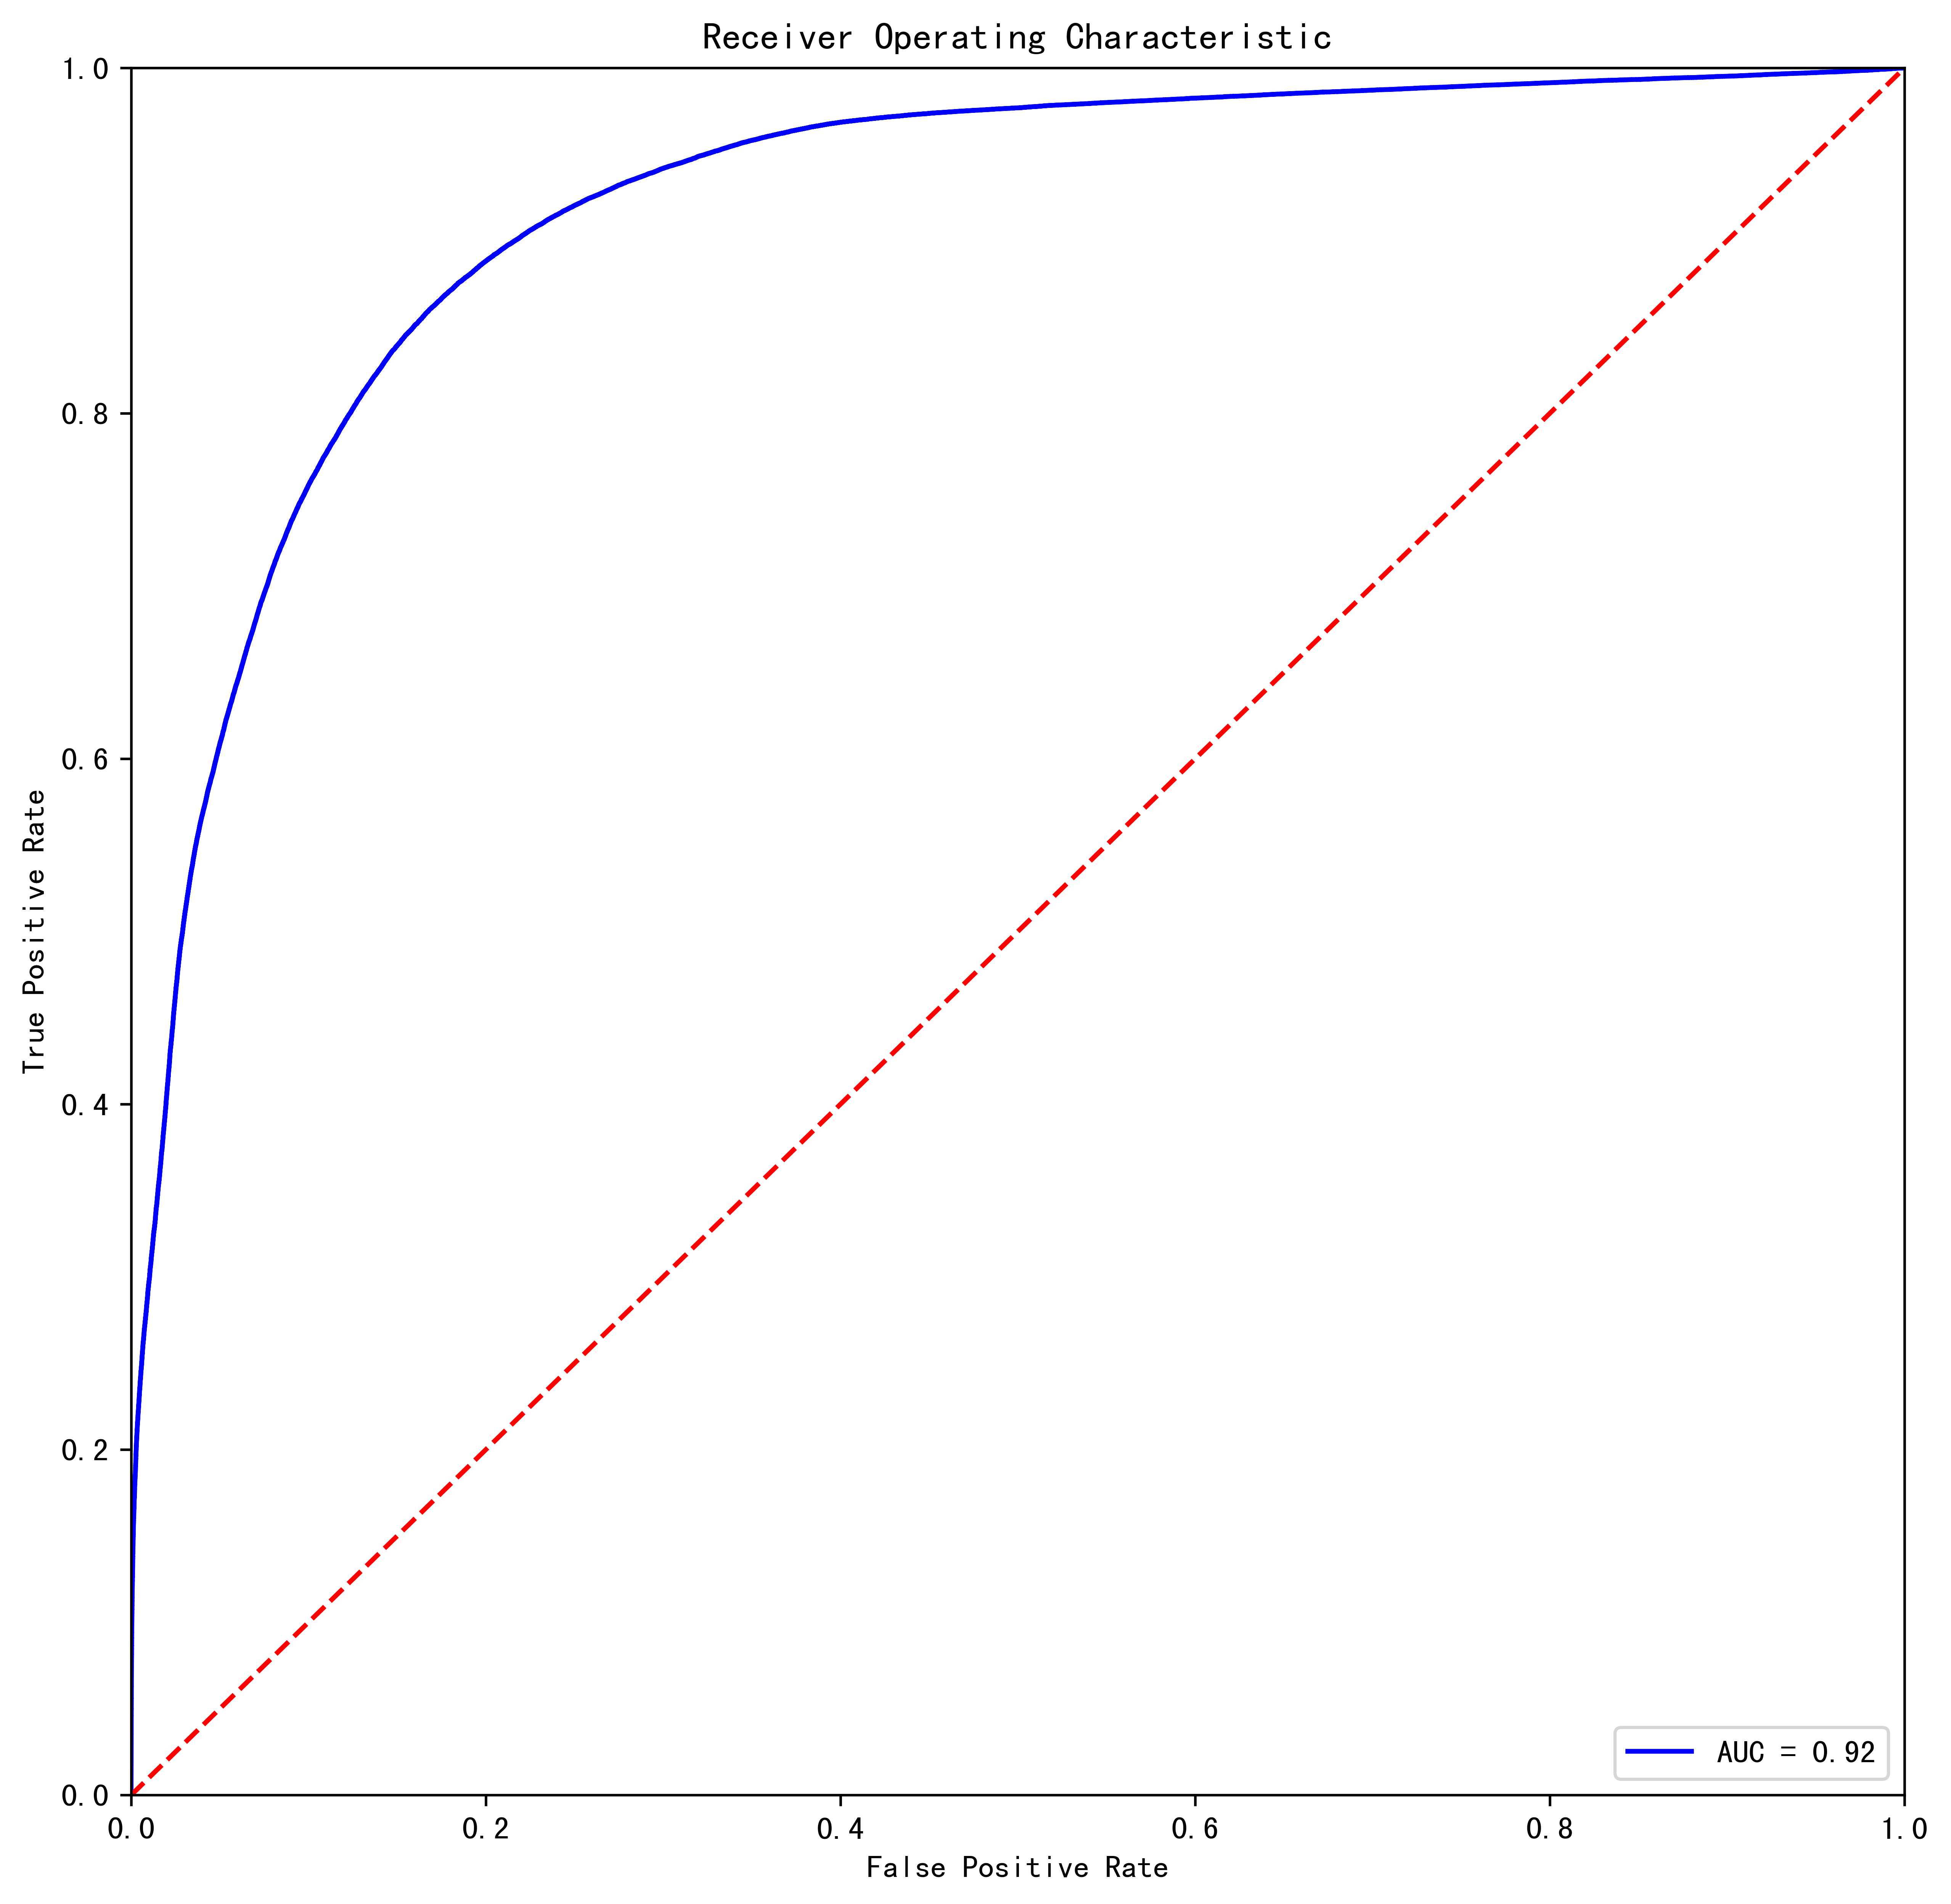

In [69]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

#第一层设置3个分类器。第一个为adaboost，第二个为randomforest，第三个为K-近邻

base1=AdaBoostClassifier( n_estimators=50, learning_rate=0.5, algorithm='SAMME.R', random_state=2023)
base2=RandomForestClassifier(n_estimators=200, criterion='gini'
                           ,max_depth=6, min_samples_leaf=50
                           ,class_weight='balanced', max_features='log2'
                           ,n_jobs=-1, random_state=2023)
base3= KNeighborsClassifier(algorithm='kd_tree',leaf_size=30,n_jobs=-1,p=2)
kfold = model_selection.KFold(n_splits=5, random_state=2023,shuffle=True)

clf=StackingClassifier(estimators=[('adaboost',base1),('random forest',base2),('knn',base3)]
                       ,cv=kfold,stack_method='predict_proba', n_jobs=-1,passthrough=False)

#运行堆叠模型并且进行预测
%time model=clf.fit(x_train,y_train) 
y_pred=model.predict(x_test)
report_stack=classification_report(y_pred,y_test,digits=6)
print(report_stack)
print(roc_auc_score(y_pred,y_test))

probs1 = clf.predict_proba(x_test)[:,1] 
fpr1, tpr1, threshold = sklearn.metrics.roc_curve(y_test, probs1) 
roc_auc1 = sklearn.metrics.auc(fpr1, tpr1) 

plt.figure(figsize=(10,10),dpi=600)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('stacking.pdf',dpi=600)

In [263]:
## 整理以下类需要用到的数据

df_c = df_w.copy()
df_c1 = df_c[['Alpha','Alpha_1','TradingDate','Symbol']]
df_c1 = df_c1.reset_index(drop = True)
df_c2 = df_c[df_alpha.columns]
df_c2 = df_c2.reset_index(drop = True)
df_c = pd.concat([df_c1,df_c2],axis=1)

## 得到泸州老窖（568）的股票数据
dflz = df_c[df_c['Symbol']==568].reset_index(drop = True)
dflz_y = dflz[['Alpha','Alpha_1','TradingDate']]
dflz_x = dflz[df_alpha.columns]
dflz = pd.concat([dflz_y,dflz_x],axis=1)
dflz

Alpha  Alpha_1 TradingDate         PE         PB         PCF  \
0    0.017999        1  2019-06-04  28.533241   5.807957  108.510308   
1    0.027591        1  2019-06-05  28.642500   5.830197  108.925811   
2    0.030022        1  2019-06-06  28.070994   5.713867  106.752409   
3    0.019189        1  2019-06-10  28.537444   5.808813  108.526289   
4    0.028639        1  2019-06-11  30.277173   6.162935  115.142381   
..        ...      ...         ...        ...        ...         ...   
479  0.053142        1  2021-05-25  69.277743  17.947773  229.118565   
480 -0.006703        0  2021-05-26  67.287578  17.432181  222.536599   
481  0.010816        1  2021-05-27  67.265628  17.426495  222.464004   
482  0.020949        1  2021-05-28  66.946128  17.343722  221.407340   
483  0.010413        1  2021-05-31  67.058319  17.372787  221.778382   

            PS  Turnover  CirculatedMarketValue  ChangeRatio        Amount  \
0     7.618012   0.01126           9.914115e+10     -0.02443  1.121116e+09   
1     7.647182   0.00769           9.952078e+10      0.00383  7.671886e+08   
2     7.494598   0.00813           9.753503e+10     -0.01995  7.989685e+08   
3     7.619134   0.00898           9.915575e+10      0.01662  8.832723e+08   
4     8.083619   0.01728           1.052006e+11      0.06096  1.792719e+09   
..         ...       ...                    ...          ...           ...   
479  24.984482   0.01385           4.159363e+11      0.07282  5.680390e+09   
480  24.266744   0.01182           4.039875e+11     -0.02873  4.809844e+09   
481  24.258828   0.00848           4.038557e+11     -0.00033  3.426533e+09   
482  24.143603   0.00560           4.019375e+11     -0.00475  2.247679e+09   
483  24.184064   0.00763           4.026111e+11      0.00168  3.025007e+09   

         PSTTM       EPS    EPSToP    NAVToP  RevenuePerShareToP  \
0     7.178538  2.396627  0.035296  0.172178            0.131268   
1     7.206026  2.396627  0.035162  0.171521            0.130767   
2     7.062244  2.396627  0.035878  0.175013            0.133429   
3     7.179596  2.396627  0.035291  0.172152            0.131249   
4     7.617285  2.396627  0.033263  0.162260            0.123707   
..         ...       ...       ...       ...                 ...   
479  22.981738  4.067933  0.014321  0.055717            0.040025   
480  22.321534  4.067933  0.014745  0.057365            0.041209   
481  22.314253  4.067933  0.014750  0.057384            0.041222   
482  22.208264  4.067933  0.014820  0.057658            0.041419   
483  22.245481  4.067933  0.014795  0.057561            0.041350   

     DividentPerShareToP  NetProfitGrowth  EquityGrowth  RevenueGrowth  \
0               0.018409         0.382435      0.156608       0.250029   
1               0.018339         0.382435      0.156608       0.250029   
2               0.018713         0.382435      0.156608       0.250029   
3               0.018407         0.382435      0.156608       0.250029   
4               0.017349         0.382435      0.156608       0.250029   
..                   ...              ...           ...            ...   
479             0.005598         0.322413      0.205547       0.193028   
480             0.005763         0.322413      0.205547       0.193028   
481             0.005765         0.322413      0.205547       0.193028   
482             0.005793         0.322413      0.205547       0.193028   
483             0.005783         0.322413      0.205547       0.193028   

     OperatingNCFGrowth  前十股东占比  
0              3.967098  0.6436  
1              3.967098  0.6436  
2              3.967098  0.6436  
3              3.967098  0.6436  
4              3.967098  0.6436  
..                  ...     ...  
479            0.178131  0.6436  
480            0.178131  0.6436  
481            0.178131  0.6436  
482            0.178131  0.6436  
483            0.178131  0.6436  

[484 rows x 22 columns]

In [262]:
## 创建股票类
## 需要利用到上面得到的Component Matrix 也可以通过以下代码读取
## comp_m = pd.read_csv('comp_matrix.csv',header = 0)
## del comp_m['Unnamed: 0']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

class Stock:
    def __init__(self,name, stkno, data):
        self.name = name
        self.stkno = stkno
        self.data_original = data
        self.record = []
        self.COMP_M = np.asmatrix(comp_m.values)
    
    def factorize(self):
        data = np.asmatrix(self.data_original.iloc[:,3:])
        data = pp.scale(data)
        self.data_factorize = np.matmul(data,self.COMP_M.T)
        return self.data_factorize
    
    def update(self,array):
        n = len(array)
        try:
            assert n == 19
        except:
            raise AssertionError("缺少必要指标！")
        else:
            self.record.append(array)
            self.data_original.loc[len(self.data_original),3:] = array
            
    def predict(self):
        a = m2.predict(np.array([pd.DataFrame(self.factorize()).loc[len(self.data_factorize)-1]]))
        return int(a)
    
    def draw(self):
        self.data_original['TradingDate'] = pd.to_datetime(self.data_original['TradingDate'])
        fig = plt.figure(figsize=(12, 3))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(self.data_original['TradingDate'],self.data_original['Alpha'], lw=2)
        ax.set_ylabel("Alpha")
        fig.autofmt_xdate()
        plt.show()


In [264]:
## Test
lz = Stock('泸州老窖','568',dflz)

In [265]:
## 因子化
lz.factorize()

matrix([[-2.9436327 , -0.29019631,  0.4014351 , ..., -1.36480186,
          1.12453162, -1.06111494],
        [-3.119885  , -0.33830934,  0.39991992, ..., -0.98460813,
         -0.04457581, -0.80172539],
        [-3.25940655, -0.29494072,  0.39593483, ..., -1.28840209,
          0.49679165, -0.90031349],
        ...,
        [ 4.88871773,  1.23111244, -0.7844942 , ...,  0.3787693 ,
         -1.15834112, -0.03280059],
        [ 4.54411541,  1.00211593, -0.65997477, ...,  0.37158977,
         -1.65922627,  0.10738845],
        [ 4.77096252,  1.15251367, -0.74085538, ...,  0.41948021,
         -1.36427867,  0.02790689]])

In [266]:
## 更新
lz.update([1,1,1,1,0,1,1,1,2,0,0,1,1,1,1,0,1,1,1])

In [267]:
lz.data_original

Alpha  Alpha_1 TradingDate         PE         PB         PCF  \
0    0.017999      1.0  2019-06-04  28.533241   5.807957  108.510308   
1    0.027591      1.0  2019-06-05  28.642500   5.830197  108.925811   
2    0.030022      1.0  2019-06-06  28.070994   5.713867  106.752409   
3    0.019189      1.0  2019-06-10  28.537444   5.808813  108.526289   
4    0.028639      1.0  2019-06-11  30.277173   6.162935  115.142381   
..        ...      ...         ...        ...        ...         ...   
480 -0.006703      0.0  2021-05-26  67.287578  17.432181  222.536599   
481  0.010816      1.0  2021-05-27  67.265628  17.426495  222.464004   
482  0.020949      1.0  2021-05-28  66.946128  17.343722  221.407340   
483  0.010413      1.0  2021-05-31  67.058319  17.372787  221.778382   
484       NaN      NaN         NaN   1.000000   1.000000    1.000000   

            PS  Turnover  CirculatedMarketValue  ChangeRatio        Amount  \
0     7.618012   0.01126           9.914115e+10     -0.02443  1.121116e+09   
1     7.647182   0.00769           9.952078e+10      0.00383  7.671886e+08   
2     7.494598   0.00813           9.753503e+10     -0.01995  7.989685e+08   
3     7.619134   0.00898           9.915575e+10      0.01662  8.832723e+08   
4     8.083619   0.01728           1.052006e+11      0.06096  1.792719e+09   
..         ...       ...                    ...          ...           ...   
480  24.266744   0.01182           4.039875e+11     -0.02873  4.809844e+09   
481  24.258828   0.00848           4.038557e+11     -0.00033  3.426533e+09   
482  24.143603   0.00560           4.019375e+11     -0.00475  2.247679e+09   
483  24.184064   0.00763           4.026111e+11      0.00168  3.025007e+09   
484   1.000000   0.00000           1.000000e+00      1.00000  1.000000e+00   

         PSTTM       EPS    EPSToP    NAVToP  RevenuePerShareToP  \
0     7.178538  2.396627  0.035296  0.172178            0.131268   
1     7.206026  2.396627  0.035162  0.171521            0.130767   
2     7.062244  2.396627  0.035878  0.175013            0.133429   
3     7.179596  2.396627  0.035291  0.172152            0.131249   
4     7.617285  2.396627  0.033263  0.162260            0.123707   
..         ...       ...       ...       ...                 ...   
480  22.321534  4.067933  0.014745  0.057365            0.041209   
481  22.314253  4.067933  0.014750  0.057384            0.041222   
482  22.208264  4.067933  0.014820  0.057658            0.041419   
483  22.245481  4.067933  0.014795  0.057561            0.041350   
484   2.000000  0.000000  0.000000  1.000000            1.000000   

     DividentPerShareToP  NetProfitGrowth  EquityGrowth  RevenueGrowth  \
0               0.018409         0.382435      0.156608       0.250029   
1               0.018339         0.382435      0.156608       0.250029   
2               0.018713         0.382435      0.156608       0.250029   
3               0.018407         0.382435      0.156608       0.250029   
4               0.017349         0.382435      0.156608       0.250029   
..                   ...              ...           ...            ...   
480             0.005763         0.322413      0.205547       0.193028   
481             0.005765         0.322413      0.205547       0.193028   
482             0.005793         0.322413      0.205547       0.193028   
483             0.005783         0.322413      0.205547       0.193028   
484             1.000000         1.000000      0.000000       1.000000   

     OperatingNCFGrowth  前十股东占比  
0              3.967098  0.6436  
1              3.967098  0.6436  
2              3.967098  0.6436  
3              3.967098  0.6436  
4              3.967098  0.6436  
..                  ...     ...  
480            0.178131  0.6436  
481            0.178131  0.6436  
482            0.178131  0.6436  
483            0.178131  0.6436  
484            1.000000  1.0000  

[485 rows x 22 columns]

In [268]:
## 更新记录
lz.record

[[1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]

In [269]:
## 捕捉异常
lz.update([1,1,1,1,0,1,1,1,2,0,0,1,1,1,1,0,1,1])

AssertionError: 缺少必要指标！

In [270]:
lz.data_original

Alpha  Alpha_1 TradingDate         PE         PB         PCF  \
0    0.017999      1.0  2019-06-04  28.533241   5.807957  108.510308   
1    0.027591      1.0  2019-06-05  28.642500   5.830197  108.925811   
2    0.030022      1.0  2019-06-06  28.070994   5.713867  106.752409   
3    0.019189      1.0  2019-06-10  28.537444   5.808813  108.526289   
4    0.028639      1.0  2019-06-11  30.277173   6.162935  115.142381   
..        ...      ...         ...        ...        ...         ...   
480 -0.006703      0.0  2021-05-26  67.287578  17.432181  222.536599   
481  0.010816      1.0  2021-05-27  67.265628  17.426495  222.464004   
482  0.020949      1.0  2021-05-28  66.946128  17.343722  221.407340   
483  0.010413      1.0  2021-05-31  67.058319  17.372787  221.778382   
484       NaN      NaN         NaN   1.000000   1.000000    1.000000   

            PS  Turnover  CirculatedMarketValue  ChangeRatio        Amount  \
0     7.618012   0.01126           9.914115e+10     -0.02443  1.121116e+09   
1     7.647182   0.00769           9.952078e+10      0.00383  7.671886e+08   
2     7.494598   0.00813           9.753503e+10     -0.01995  7.989685e+08   
3     7.619134   0.00898           9.915575e+10      0.01662  8.832723e+08   
4     8.083619   0.01728           1.052006e+11      0.06096  1.792719e+09   
..         ...       ...                    ...          ...           ...   
480  24.266744   0.01182           4.039875e+11     -0.02873  4.809844e+09   
481  24.258828   0.00848           4.038557e+11     -0.00033  3.426533e+09   
482  24.143603   0.00560           4.019375e+11     -0.00475  2.247679e+09   
483  24.184064   0.00763           4.026111e+11      0.00168  3.025007e+09   
484   1.000000   0.00000           1.000000e+00      1.00000  1.000000e+00   

         PSTTM       EPS    EPSToP    NAVToP  RevenuePerShareToP  \
0     7.178538  2.396627  0.035296  0.172178            0.131268   
1     7.206026  2.396627  0.035162  0.171521            0.130767   
2     7.062244  2.396627  0.035878  0.175013            0.133429   
3     7.179596  2.396627  0.035291  0.172152            0.131249   
4     7.617285  2.396627  0.033263  0.162260            0.123707   
..         ...       ...       ...       ...                 ...   
480  22.321534  4.067933  0.014745  0.057365            0.041209   
481  22.314253  4.067933  0.014750  0.057384            0.041222   
482  22.208264  4.067933  0.014820  0.057658            0.041419   
483  22.245481  4.067933  0.014795  0.057561            0.041350   
484   2.000000  0.000000  0.000000  1.000000            1.000000   

     DividentPerShareToP  NetProfitGrowth  EquityGrowth  RevenueGrowth  \
0               0.018409         0.382435      0.156608       0.250029   
1               0.018339         0.382435      0.156608       0.250029   
2               0.018713         0.382435      0.156608       0.250029   
3               0.018407         0.382435      0.156608       0.250029   
4               0.017349         0.382435      0.156608       0.250029   
..                   ...              ...           ...            ...   
480             0.005763         0.322413      0.205547       0.193028   
481             0.005765         0.322413      0.205547       0.193028   
482             0.005793         0.322413      0.205547       0.193028   
483             0.005783         0.322413      0.205547       0.193028   
484             1.000000         1.000000      0.000000       1.000000   

     OperatingNCFGrowth  前十股东占比  
0              3.967098  0.6436  
1              3.967098  0.6436  
2              3.967098  0.6436  
3              3.967098  0.6436  
4              3.967098  0.6436  
..                  ...     ...  
480            0.178131  0.6436  
481            0.178131  0.6436  
482            0.178131  0.6436  
483            0.178131  0.6436  
484            1.000000  1.0000  

[485 rows x 22 columns]

In [271]:
#预测
lz.predict()

1

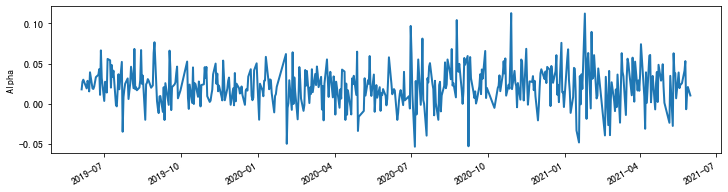

In [272]:
lz.draw()

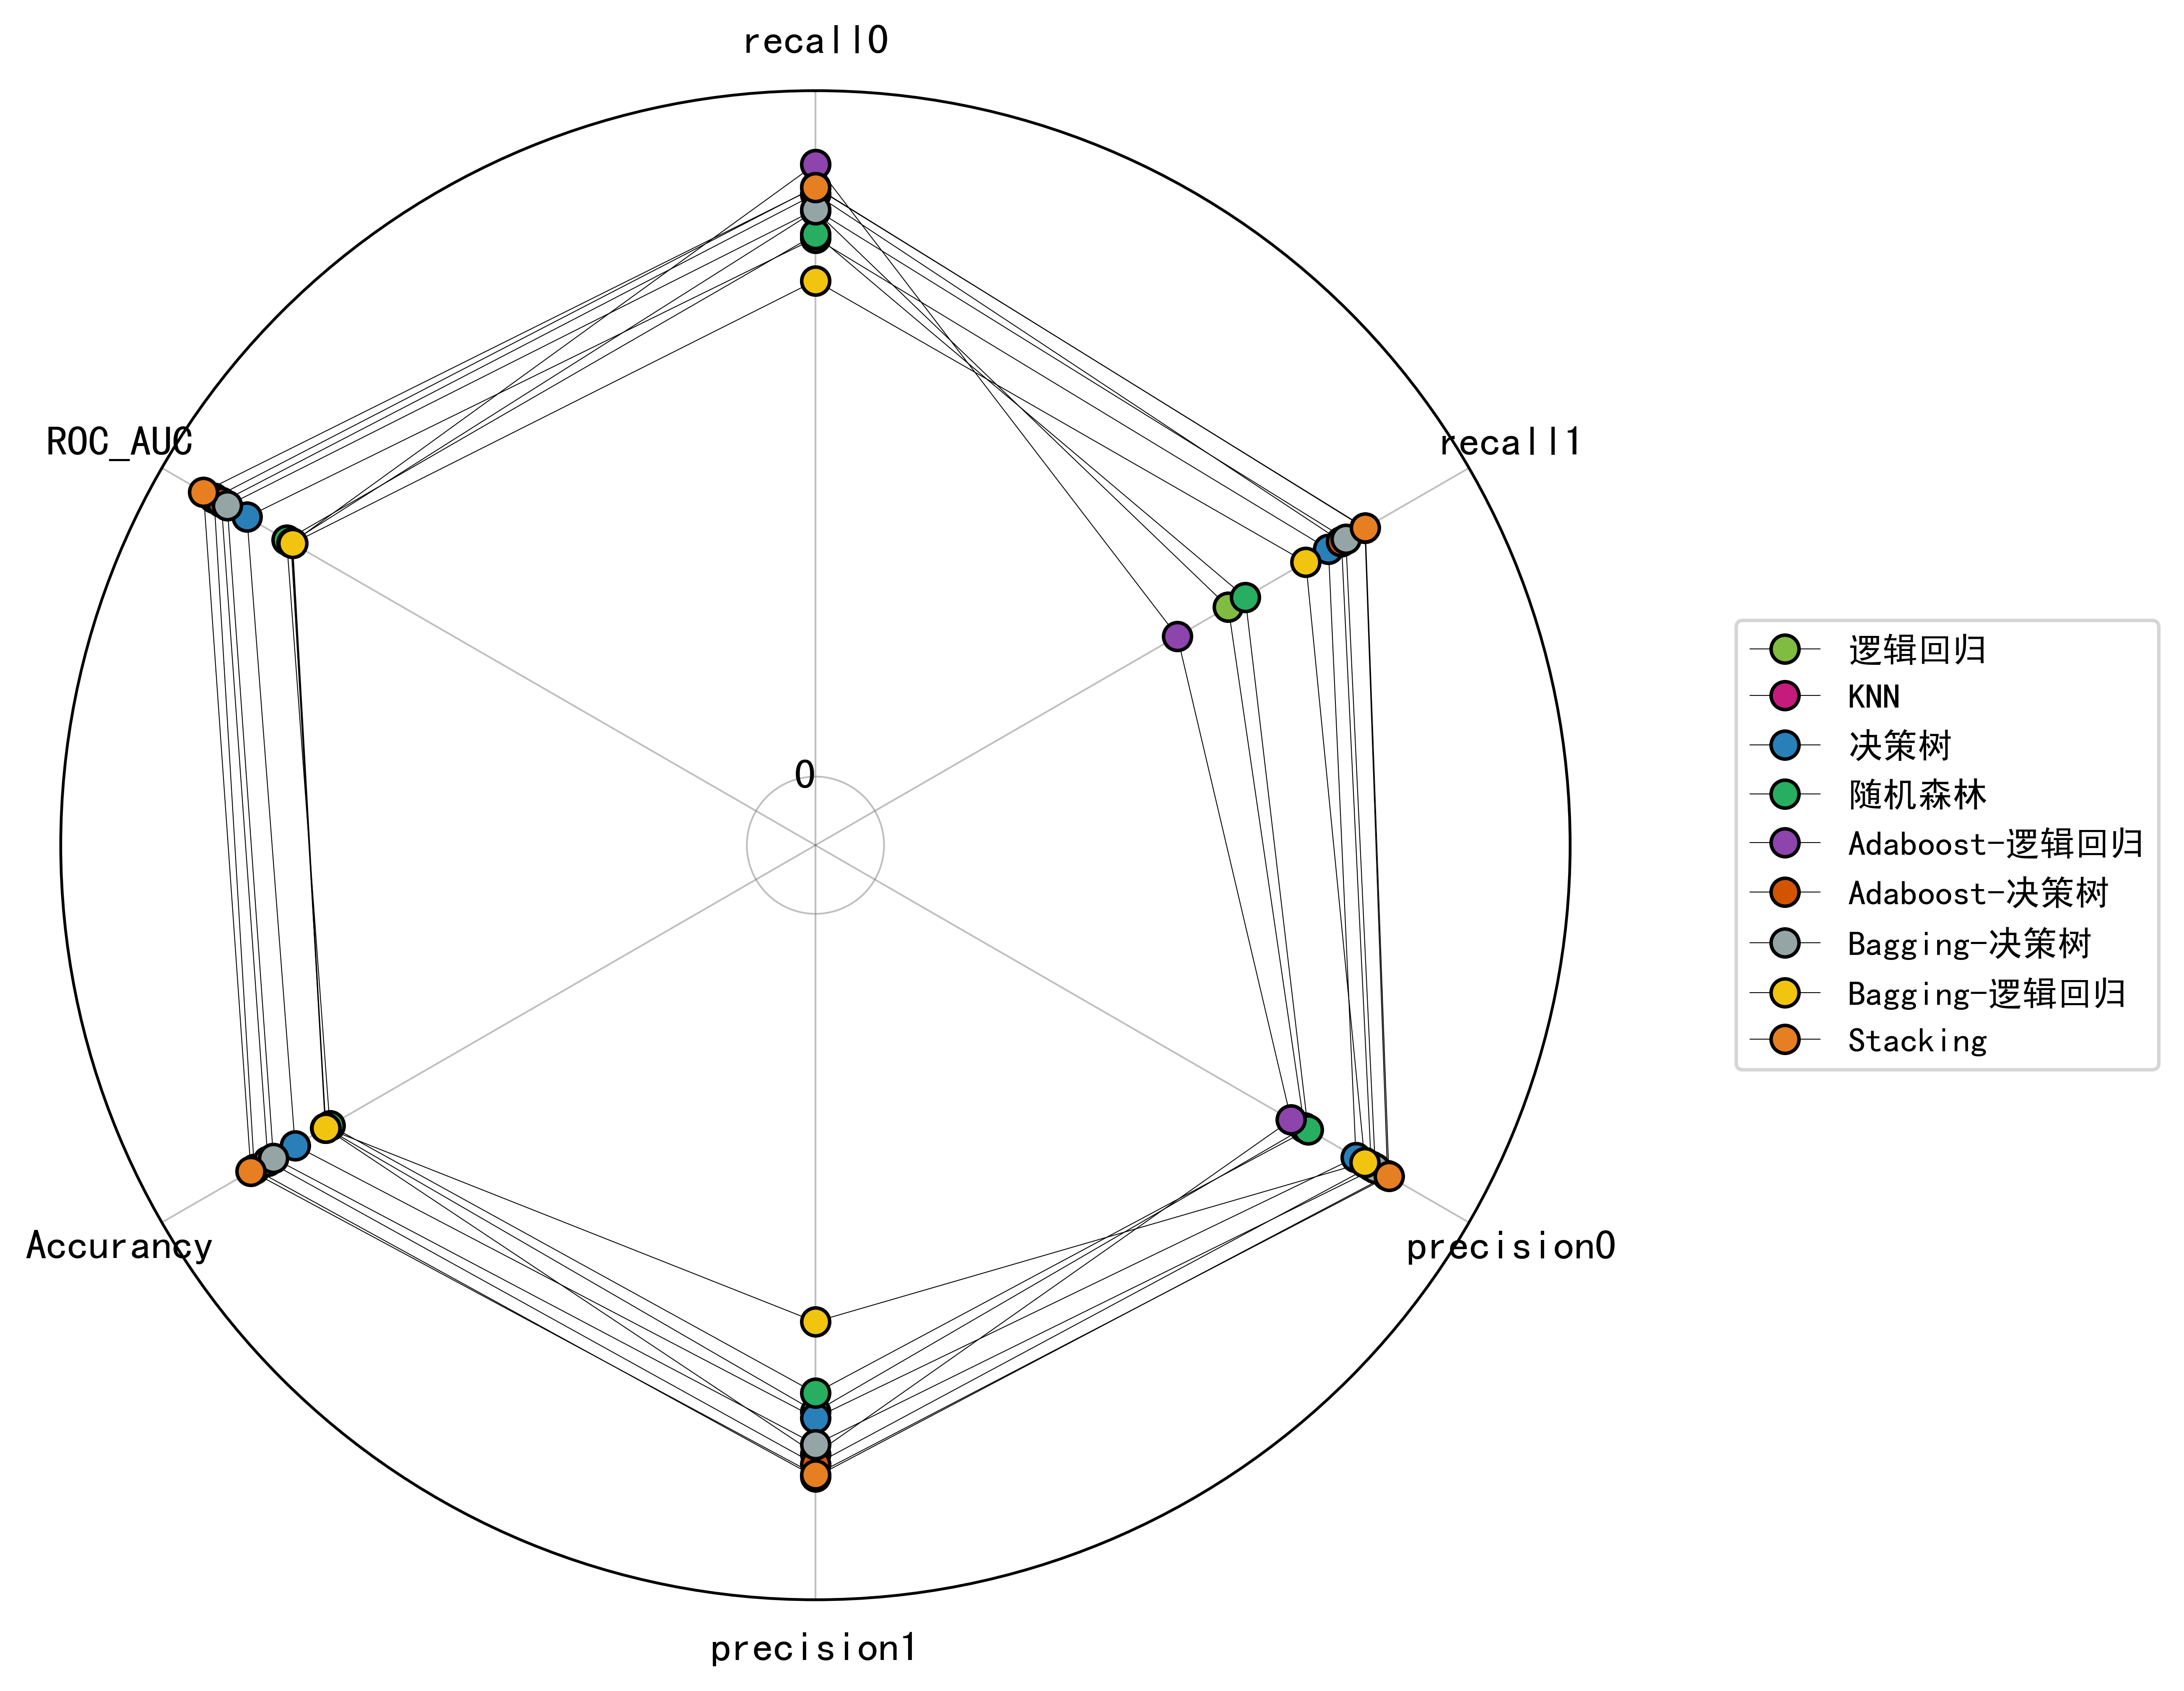

In [290]:
## 方法对比 雷达图
from matplotlib.pyplot import *
df_compare = pd.read_csv('compare.csv')
df_compare['Unnamed: 0'] = pd.Categorical(df_compare['Unnamed: 0'])
N = df_compare.shape[0]
angles = [n/float(N)*2*np.pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(10,10), dpi=600)
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

plt.xticks(angles[:-1], labels=df_compare['Unnamed: 0'], color='k', size=12)
plt.ylim(-0.1, 1)
plt.yticks(np.arange(0, 1, 10), color='k', size=12, verticalalignment='center', horizontalalignment='right')
#horizontalalignment='right',右侧与90度垂直线对齐
plt.grid(which='major', axis='x', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
plt.grid(which='major', axis='y', linestyle='-', linewidth='0.5', color='gray', alpha=0.5)

values=df_compare['逻辑回归'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#7FBC41', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#7FBC41', markersize=8, color='k', linewidth=0.25, label='逻辑回归')

values=df_compare['KNN'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#C51B7D', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#C51B7D', markersize=8, color='k', linewidth=0.25, label='KNN')

values=df_compare['决策树'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#2980b9', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#2980b9', markersize=8, color='k', linewidth=0.25, label='决策树')
values=df_compare['随机森林'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#27ae60', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#27ae60', markersize=8, color='k', linewidth=0.25, label='随机森林')

values=df_compare['Adaboost-逻辑回归'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#8e44ad', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#8e44ad', markersize=8, color='k', linewidth=0.25, label='Adaboost-逻辑回归')

values=df_compare['Adaboost-决策树'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#d35400', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#d35400', markersize=8, color='k', linewidth=0.25, label='Adaboost-决策树')

values=df_compare['Bagging-决策树'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#95a5a6', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#95a5a6', markersize=8, color='k', linewidth=0.25, label='Bagging-决策树')

values=df_compare['Bagging-逻辑回归'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#f1c40f', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#f1c40f', markersize=8, color='k', linewidth=0.25, label='Bagging-逻辑回归')

values=df_compare['Stacking'].values.flatten().tolist()
values += values[:1]
#ax.fill(angles, values, '#e67e22', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#e67e22', markersize=8, color='k', linewidth=0.25, label='Stacking')
plt.legend(loc='center', bbox_to_anchor=(1.25, 0, 0, 1))
plt.savefig('randor.pdf',dpi=600)
plt.show()


In [293]:
df_w['Symbol'].value_counts()

1.0         484
600197.0    484
600201.0    484
600202.0    484
600206.0    484
           ... 
688289.0    181
688569.0    180
3000.0      170
29.0        136
688160.0    133
Name: Symbol, Length: 3083, dtype: int64